In [ ]:
# Import Pandas library with alias "pd"
# Read data from 'Darknet-downloaded -Pre-proceed.csv' and store it in the "dataset" DataFrame


In [8]:
import pandas as pd
dataset = pd.read_csv('Darknet-downloaded -Pre-proceed.csv')

In [ ]:

#The code creates two identical DataFrames 'x' and 'x1' by removing the 'Label' and 'Label1' columns from 'dataset' while one-hot encoding the 'Label' column and storing the result in 'y'.

In [9]:
x = dataset.drop(['Label','Label1'], axis = 1, inplace = False)
x1 = dataset.drop(['Label','Label1'], axis = 1, inplace = False)
y= dataset['Label']

In [10]:
# One-hot encoding a single column
from sklearn.preprocessing import OneHotEncoder
import numpy as np
arr = []
for i in y:
    arr.append([i])    
ohe = OneHotEncoder()
transformed = ohe.fit_transform(arr)
y = transformed.toarray()

# Gini Index

In [ ]:
#The provided code calculates the Gini index for each attribute in the 'x' DataFrame and stores the results in 'gini_arr_num' with corresponding attribute names in 'gini_arr_label'. The Gini index measures the impurity of the attributes, and the code outputs the attribute name and its Gini index, as well as the elapsed time for the computation.

In [11]:
# Gini function as PyGini package
gini_arr_num = {}
gini_arr_label = {}
def gini(arr, eps=1e-8):
    # All values are treated equally, arrays must be 1d and > 0:
    arr = np.abs(arr).flatten() + eps
    
    

    # Values must be sorted:
    arr = np.sort(arr)

    # Index per array element:
    index = np.arange(1, arr.shape[0]+1)

    # Number of array elements:
    N = arr.shape[0]

    # Gini coefficient:
    return(np.sum((2*index - N - 1)*arr))/(N*np.sum(arr))

import numpy as np
import time

start_time = time.time()
print('Attribute Name',"\t\t", "Gini Index")
for i in range(len(x.columns)):
    print(i+1, "\t", x.columns[i], "\t", gini(np.array(x[::][x.columns[i]])))
    gini_arr_num[i+1] =  gini(np.array(x[::][x.columns[i]]))
    gini_arr_label[i+1] = x.columns[i]
end_time = time.time()
time_taken = end_time - start_time
print(f"Elapsed time to compute : ",time_taken)

Attribute Name 		 Gini Index
1 	 Src Port 	 0.27259548981466286
2 	 Dst Port 	 0.6401289521759403
3 	 Protocol 	 0.25801050995821584
4 	 Flow Duration 	 0.7892093240532864
5 	 Total Fwd Packet 	 0.978280281918752
6 	 Total Bwd packets 	 0.9857568681018931
7 	 Total Length of Fwd Packet 	 0.9960465828659086
8 	 Total Length of Bwd Packet 	 0.9952924927134138
9 	 Fwd Packet Length Max 	 0.7908711797331016
10 	 Fwd Packet Length Min 	 0.7153548531404693
11 	 Fwd Packet Length Mean 	 0.7412855879550574
12 	 Fwd Packet Length Std 	 0.8414857566270476
13 	 Bwd Packet Length Max 	 0.8161719648692128
14 	 Bwd Packet Length Min 	 0.8626696990647671
15 	 Bwd Packet Length Mean 	 0.805650694461177
16 	 Bwd Packet Length Std 	 0.8852907750756391
17 	 Flow Bytes/s 	 0.9308812189568492
18 	 Flow Packets/s 	 0.936328541623797
19 	 Flow IAT Mean 	 0.8310698198376144
20 	 Flow IAT Std 	 0.8425077515758028
21 	 Flow IAT Max 	 0.8033976023644267
22 	 Flow IAT Min 	 0.9456893818042907
23 	 Fwd IAT Total 	

The code provided seems to be intended to sort the attributes based on their Gini indices and then retrieve the attribute with the highest Gini index.

In [12]:


gini_arr_num = sorted(gini_arr_num.items(), key = lambda x : x[1], reverse = True)


In [13]:
print(gini_arr_label)

{1: 'Src Port', 2: 'Dst Port', 3: 'Protocol', 4: 'Flow Duration', 5: 'Total Fwd Packet', 6: 'Total Bwd packets', 7: 'Total Length of Fwd Packet', 8: 'Total Length of Bwd Packet', 9: 'Fwd Packet Length Max', 10: 'Fwd Packet Length Min', 11: 'Fwd Packet Length Mean', 12: 'Fwd Packet Length Std', 13: 'Bwd Packet Length Max', 14: 'Bwd Packet Length Min', 15: 'Bwd Packet Length Mean', 16: 'Bwd Packet Length Std', 17: 'Flow Bytes/s', 18: 'Flow Packets/s', 19: 'Flow IAT Mean', 20: 'Flow IAT Std', 21: 'Flow IAT Max', 22: 'Flow IAT Min', 23: 'Fwd IAT Total', 24: 'Fwd IAT Mean', 25: 'Fwd IAT Std', 26: 'Fwd IAT Max', 27: 'Fwd IAT Min', 28: 'Bwd IAT Total', 29: 'Bwd IAT Mean', 30: 'Bwd IAT Std', 31: 'Bwd IAT Max', 32: 'Bwd IAT Min', 33: 'Fwd PSH Flags', 34: 'Bwd PSH Flags', 35: 'Fwd URG Flags', 36: 'Bwd URG Flags', 37: 'Fwd Header Length', 38: 'Bwd Header Length', 39: 'Fwd Packets/s', 40: 'Bwd Packets/s', 41: 'Packet Length Min', 42: 'Packet Length Max', 43: 'Packet Length Mean', 44: 'Packet Lengt

In [14]:
print(gini_arr_num)

[(7, 0.9960465828659086), (8, 0.9952924927134138), (62, 0.9922623162473467), (70, 0.9898024883989146), (50, 0.9870827574760773), (38, 0.9868029779582215), (63, 0.9867198849069382), (49, 0.9866646047569297), (6, 0.9857568681018931), (48, 0.9830639242695592), (37, 0.981158368594176), (5, 0.978280281918752), (32, 0.9710879098384642), (40, 0.9458022231452782), (22, 0.9456893818042907), (27, 0.9417053221667876), (39, 0.9374292195769465), (18, 0.936328541623797), (77, 0.9323566466472226), (17, 0.9308812189568492), (29, 0.9136534051789937), (30, 0.9032366576420673), (33, 0.9004379792272198), (45, 0.8889079621254442), (16, 0.8852907750756391), (25, 0.8720663774202803), (31, 0.8669697714788606), (69, 0.8640515500909699), (24, 0.8633030712462979), (14, 0.8626696990647671), (20, 0.8425077515758028), (12, 0.8414857566270476), (28, 0.8410383705747471), (19, 0.8310698198376144), (26, 0.8213834725741186), (13, 0.8161719648692128), (67, 0.8160530996218297), (15, 0.805650694461177), (57, 0.805650694461

In [15]:
print(gini_arr_label[gini_arr_num[0][0]])
print(gini_arr_num[0][0])
print(type(np.array(dataset[gini_arr_label[gini_arr_num[0][0]]])))
# x
# (gini_arr_label[gini_arr_num[index][0]],

Total Length of Fwd Packet
7
<class 'numpy.ndarray'>


## THRESHOLD

The code iterates through a range of Gini index threshold values, selects features based on Gini indices, and evaluates a Random Forest Classifier's performance, including accuracy, precision, recall, and F1-score, for each threshold. It also displays confusion matrices for different thresholds.

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

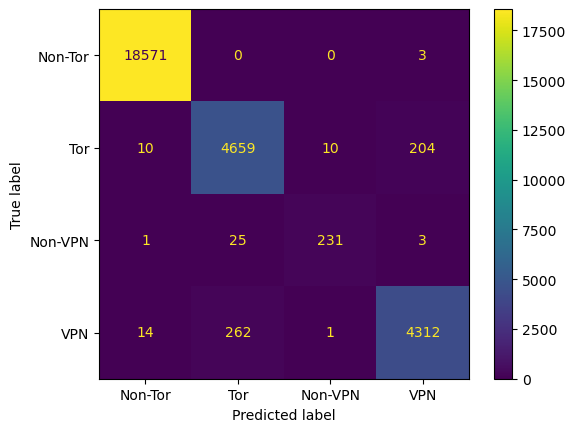

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

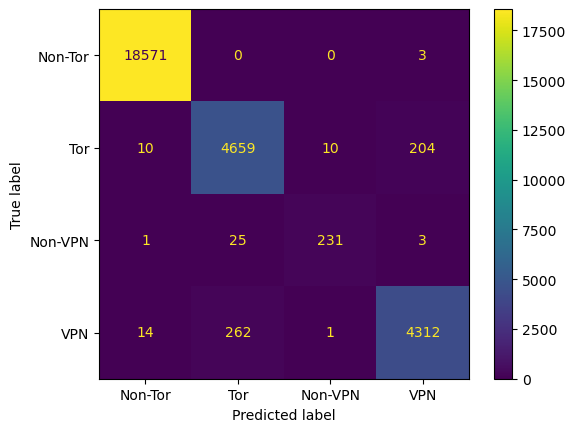

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

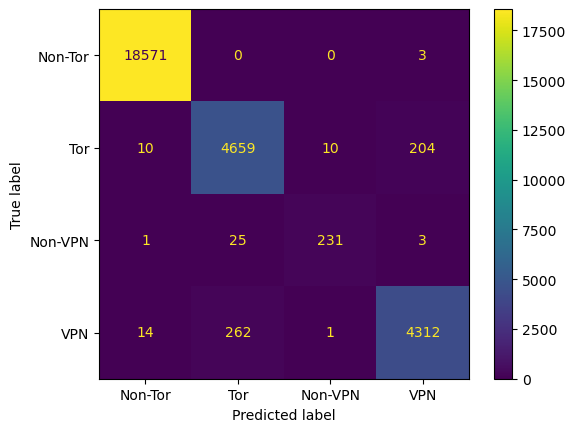

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

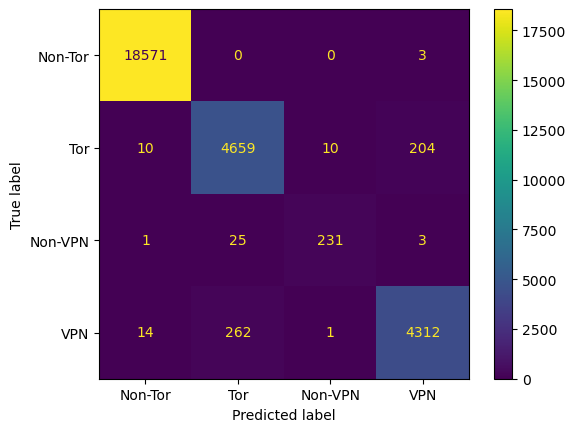

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

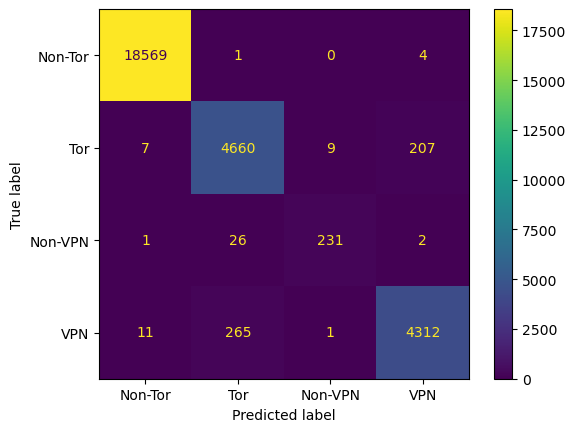

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

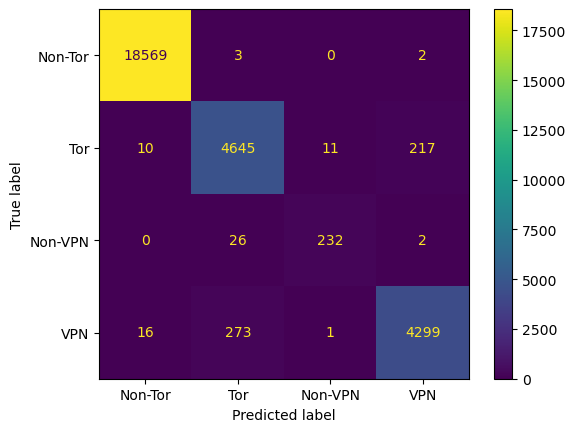

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

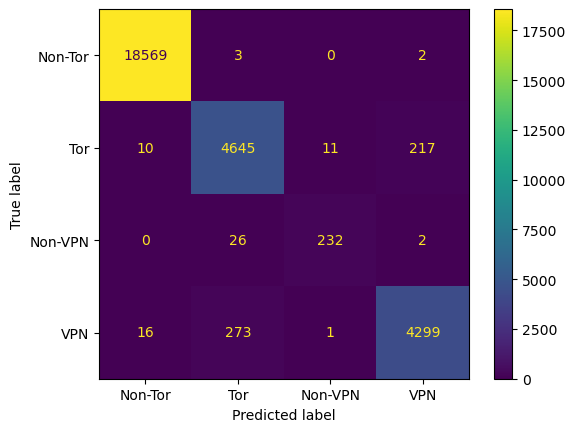

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

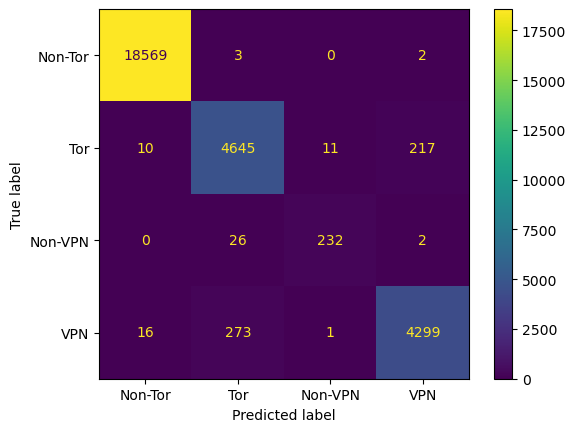

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

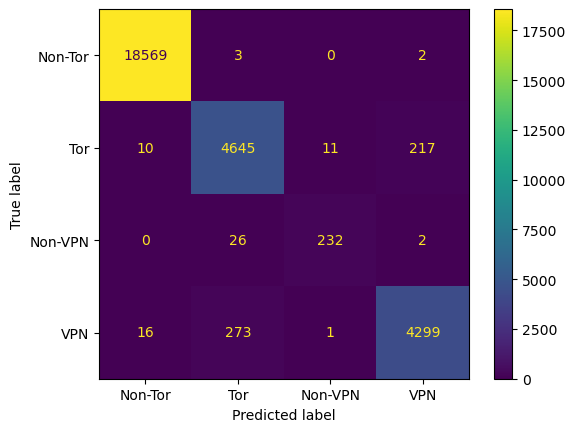

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

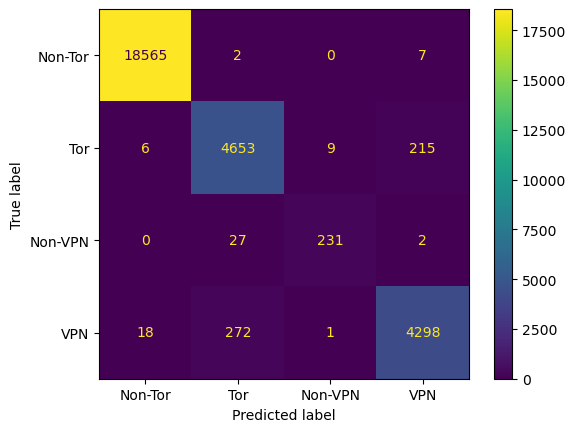

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

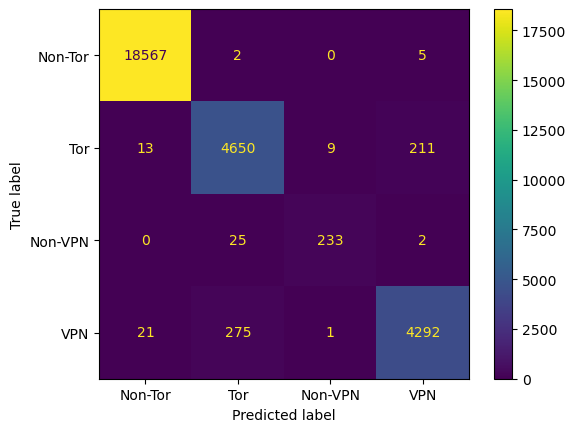

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

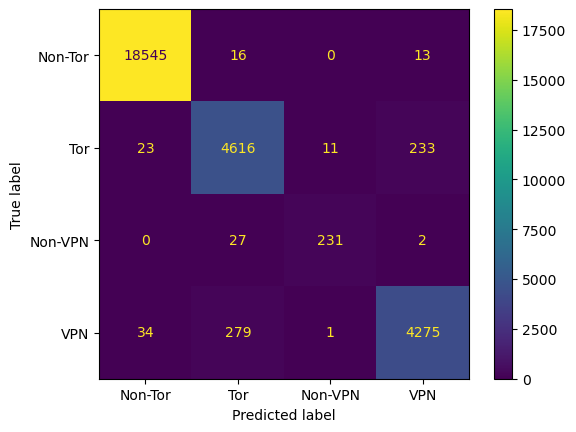

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.8669697714788606
Bwd Init Win Bytes		0.8640515500909699
Fwd IAT Mean		0.8633030712462979
Bw

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198

No of Features Selected :  22
THRESHOLOD VALUE  :  0.9
Elapsed time to compute :  42.62392020225525
Accuracy: 96.378860
Precision: 96.326336
Recall: 96.378860
F1_SCORE : 96.331660
Confusion Metrics:
 [[18508    43     4   

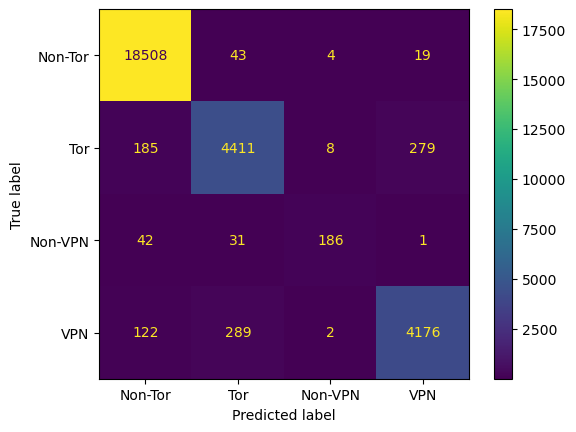

Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642

No of Features Selected :  12
THRESHOLOD VALUE  :  0.95
Elapsed time to compute :  18.169284343719482
Accuracy: 91.948703
Precision: 91.842858
Recall: 91.948703
F1_SCORE : 91.864470
Confusion Metrics:
 [[18289   263     4    18]
 [  304  3701    14   864]
 [   50    26   179     5]
 [  136   591     4  3858]]




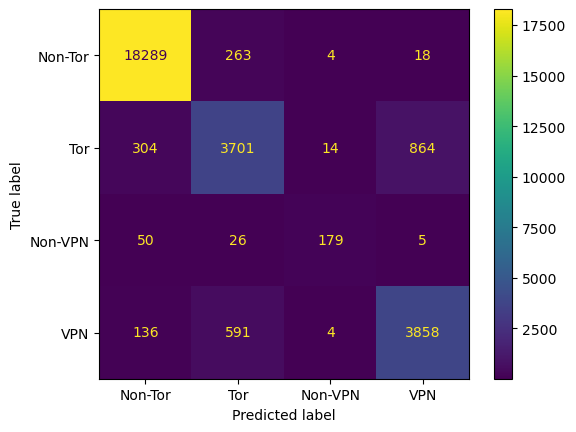

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


for i in range(5, 100, 5):
    gini_index = i/100
    count = 0
    attr=''
    temp_dataset = pd.DataFrame()
    for j in range(1, 79):
        if(gini_arr_num[j][1] >= gini_index):
            count+=1
            temp_dataset[gini_arr_label[gini_arr_num[j][0]]] =  dataset[gini_arr_label[gini_arr_num[j][0]]]
            attr += str(gini_arr_label[gini_arr_num[j][0]]) +"\t\t" + str(gini_arr_num[j][1]) + "\n"
    print(attr)
    X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=100)
    start_time = time.time()
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    classifier.fit(X_train, y_train)
    print("No of Features Selected : ", count)
    print("THRESHOLOD VALUE  : ", gini_index)
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    time_taken = end_time - start_time
    print("Elapsed time to compute : ",time_taken)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy*100))
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %.6f' % (precision*100))
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %.6f' % (recall*100))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1_SCORE : %.6f' % (f1*100))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Metrics:\n", cm)
    print("\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
    cm_display.plot()
    plt.show()

The code iteratively selects the top 5 features based on Gini indices 15 times, trains a Random Forest Classifier, and evaluates its performance, displaying accuracy, precision, recall, and confusion matrices at each step. This process assesses the effect of gradually adding features on the classifier's performance.




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773

No of Features Selected :  5
Elapsed time to compute :  14.996002197265625
Accuracy: 91.175016
Precision: 90.852540
Recall: 91.175016
F1_SCORE : 90.899181
Confusion Metrics:
 [[18478   139     6    35]
 [  576  3577     3   663]
 [   41    21   179     8]
 [  476   528     2  3574]]







Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592

No of Features Selected :  10
Elapsed time to compute :  17.853083610534668
Accuracy: 93.319438
Precision: 93.155920
Recall: 93.319438
F1_SCORE : 93.187087
Confusion Metrics:
 [[18601    32     2    23]
 [  276  3850     1   692]
 [   42    26   174     7]
 [  215   575     0  3790]]







Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907

No of Features Selected :  15
Elapsed time to compute :  27.137285709381104
Accuracy: 96.753339
Precision: 96.711957
Recall: 96.753339
F1_SCORE : 96.712615
Confusion Metrics:
 [[18594    34     4    26]
 [  179  4405     8   227]
 [   38    31   174     6]
 [   85   280     1  4214]]




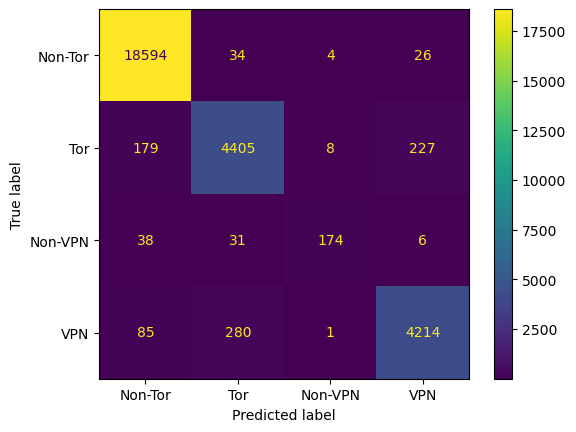




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492

No of Features Selected :  20
Elapsed time to compute :  44.02460050582886
Accuracy: 96.756871
Precision: 96.720034
Recall: 96.756871
F1_SCORE : 96.716528
Confusion Metrics:
 [[18597    33     1    27]
 [  173  4409     6   231]
 [   37    2

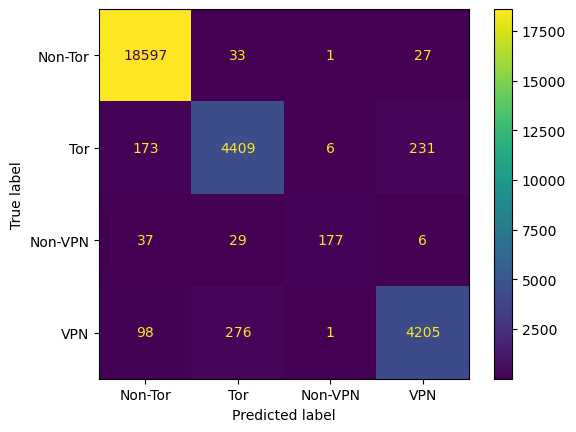




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391

No of Features Selected :  25
Elapsed time to compute :  

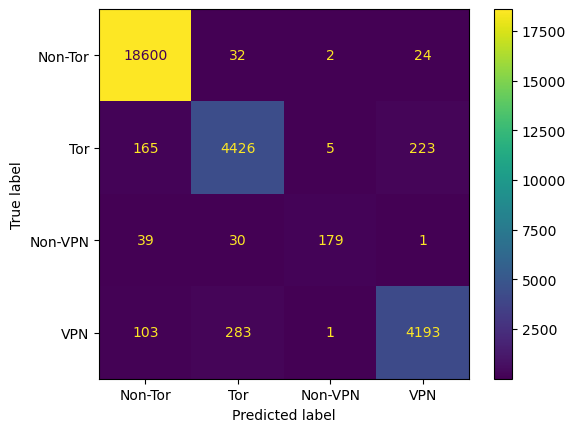




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147

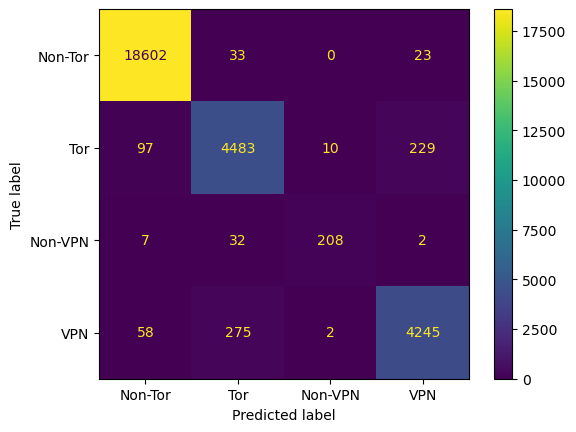




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147

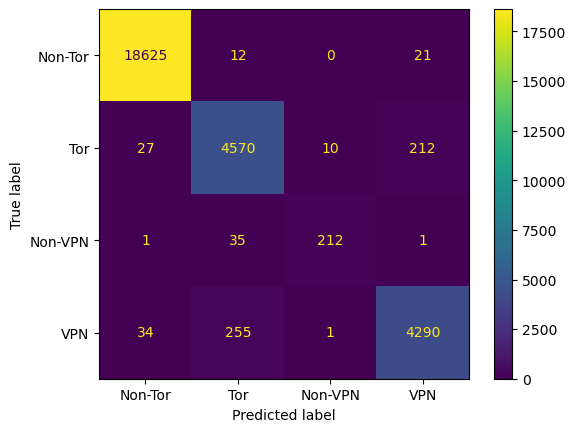




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147

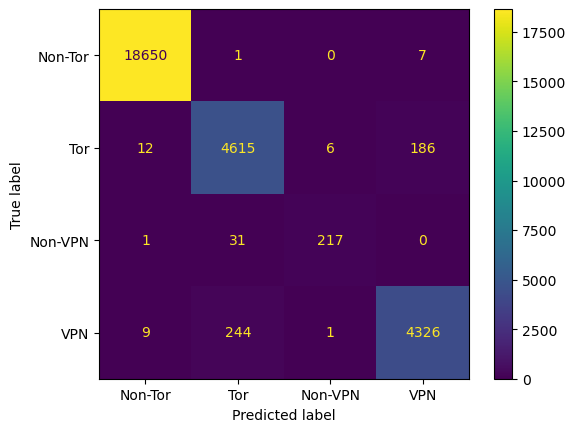




Names of Features selected : 
Total Length of Fwd Packet		0.9960465828659086
Total Length of Bwd Packet		0.9952924927134138
Bwd Packet/Bulk Avg		0.9922623162473467
Fwd Act Data Pkts		0.9898024883989146
ACK Flag Count		0.9870827574760773
Bwd Header Length		0.9868029779582215
Bwd Bulk Rate Avg		0.9867198849069382
PSH Flag Count		0.9866646047569297
Total Bwd packets		0.9857568681018931
RST Flag Count		0.9830639242695592
Fwd Header Length		0.981158368594176
Total Fwd Packet		0.978280281918752
Bwd IAT Min		0.9710879098384642
Bwd Packets/s		0.9458022231452782
Flow IAT Min		0.9456893818042907
Fwd IAT Min		0.9417053221667876
Fwd Packets/s		0.9374292195769465
Flow Packets/s		0.936328541623797
Idle Std		0.9323566466472226
Flow Bytes/s		0.9308812189568492
Bwd IAT Mean		0.9136534051789937
Bwd IAT Std		0.9032366576420673
Fwd PSH Flags		0.9004379792272198
Packet Length Variance		0.8889079621254442
Bwd Packet Length Std		0.8852907750756391
Fwd IAT Std		0.8720663774202803
Bwd IAT Max		0.86696977147

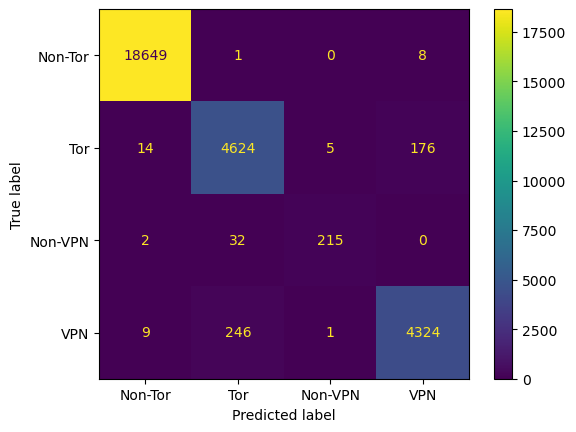

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
temp_dataset = pd.DataFrame()

t = 15
index = 0
attr = ''
# temp_dataset = temp_dataset.drop(['Label'] , axis = 1, inplace = False)
while(t> 0):
    t-=1
    print("\n\n\nNames of Features selected : ")
    for i in range(5):
        temp_dataset[gini_arr_label[gini_arr_num[index][0]]] =  dataset[gini_arr_label[gini_arr_num[index][0]]]
        attr += str(gini_arr_label[gini_arr_num[index][0]]) +"\t\t" + str(gini_arr_num[index][1]) + "\n"
        index+=1
    print(attr)
    X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
    start_time = time.time()
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    classifier.fit(X_train, y_train)
    print("No of Features Selected : ", index)
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    time_taken = end_time - start_time
    print("Elapsed time to compute : ",time_taken)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy*100))
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %.6f' % (precision*100))
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %.6f' % (recall*100))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1_SCORE : %.6f' % (f1*100))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Metrics:\n", cm)
    print("\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
    cm_display.plot()
    plt.show()
# print(X_train_fs)

The code identifies and prints columns from 'x' with a Gini index below 0.001, eliminating them from 'x1'. It then displays the count of remaining selected features in 'x1'.

In [18]:
print("Following features are eleminated After applying Gini Index")
print('Attribute Name',"\t\t", "Gini Index")
for i in x.columns:
    if(gini(np.array(x[::][i])) < 0.001):
        x1 = x1.drop([i], axis = 1, inplace = False)
        print(i, "\t\t", gini(np.array(x[::][i])))

print("No of Feature Selected : ",x1.shape)

Following features are eleminated After applying Gini Index
Attribute Name 		 Gini Index
Bwd PSH Flags 		 2.217038361521927e-17
Fwd URG Flags 		 2.217038361521927e-17
Bwd URG Flags 		 2.217038361521927e-17
URG Flag Count 		 2.217038361521927e-17
CWE Flag Count 		 2.217038361521927e-17
ECE Flag Count 		 2.217038361521927e-17
Fwd Bytes/Bulk Avg 		 2.217038361521927e-17
Fwd Packet/Bulk Avg 		 2.217038361521927e-17
Fwd Bulk Rate Avg 		 2.217038361521927e-17
Bwd Bytes/Bulk Avg 		 2.217038361521927e-17
Subflow Bwd Packets 		 2.217038361521927e-17
Active Mean 		 2.217038361521927e-17
Active Std 		 2.217038361521927e-17
Active Max 		 2.217038361521927e-17
Active Min 		 2.217038361521927e-17
No of Feature Selected :  (141530, 64)


This code trains a Random Forest Classifier on 'x' and 'y', evaluates its performance, and displays the accuracy, precision, recall, and F1-score. It also calculates and displays the confusion matrix and measures the time taken for the computation.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import time

start_time = time.time()

# Assuming that 'x' and 'y' are your input features and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

classifier = RandomForestClassifier(max_depth=19, random_state=50)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

end_time = time.time()

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.6f' % (accuracy * 100))

precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %.6f' % (precision * 100))

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %.6f' % (recall * 100))

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1_SCORE : %.6f' % (f1 * 100))

# Convert one-hot encoded labels back to class labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_labels, y_pred_labels)
print("Confusion Metrics:\n", cm)
print("\n")

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
cm_display.plot()
plt.show()

time_taken = end_time - start_time
print("Elapsed time to compute : ", time_taken)


Accuracy: 98.071080
Precision: 98.208733
Recall: 98.071080
F1_SCORE : 98.135698
Confusion Metrics:
 [[18570     0     0     4]
 [   25  4656     3   199]
 [    4    25   229     2]
 [   28   255     1  4305]]




Elapsed time to compute :  71.940256357193


This code uses K-Fold cross-validation to assess the performance of a Random Forest Classifier trained on 'x' and 'y'. It calculates the mean accuracy score over 10 folds and measures the time taken for the computation.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
import time
start_time = time.time()
cv = KFold(n_splits = 10)
classifier = RandomForestClassifier(max_depth=19, random_state=50)

scores = cross_val_score(classifier, x, y, scoring='accuracy', cv = cv)

# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
end_time = time.time()

# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy: %.6f' % (accuracy*100))
print("Accuracy : ", mean(scores))
time_taken = end_time - start_time
print("Elapsed time to compute : ",time_taken)

Accuracy :  0.9090510845757084
Elapsed time to compute :  738.6050992012024


In [ ]:

#This code uses K-Fold cross-validation to assess the performance of a Random Forest Classifier trained on 'x1' and 'y' (presumably 'x1' represents a reduced feature set). It calculates the mean accuracy score over 10 folds and measures the time taken for the computation.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
import time
start_time = time.time()
cv = KFold(n_splits = 10)
classifier = RandomForestClassifier(max_depth=19, random_state=50)

scores = cross_val_score(classifier, x1, y, scoring='accuracy', cv = cv)

# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
end_time = time.time()

# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy: %.6f' % (accuracy*100))
print("Accuracy : ", mean(scores))
time_taken = end_time - start_time
print("Elapsed time to compute : ",time_taken)

Accuracy :  0.9095174168020914
Elapsed time to compute :  871.8551256656647


The code snippet provided prints the list of accuracy scores obtained during K-Fold cross-validation for the Random Forest Classifier. The 'scores' variable contains these accuracy scores for each fold, and the code simply displays the list of scores.

In [22]:
print(scores)

[0.99809228 0.99858687 0.99243977 1.         1.         1.
 0.96318802 0.74676747 0.72627711 0.66982265]


### RandomForestClassifier

The code iterates through various test set sizes (from 10% to 90%), trains a Random Forest Classifier, and evaluates accuracy for each test set size while measuring computation time, providing insights into the impact of test set size on classifier performance.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
for i in range(10, 100, 10):
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size =i/100, random_state = 100)    
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy*100))
    time_taken = end_time - start_time
    print("Elapsed time to compute : ",time_taken)
    print("\n")

Accuracy: 98.042818
Elapsed time to compute :  76.53936171531677


Accuracy: 98.071080
Elapsed time to compute :  67.73272466659546


Accuracy: 97.943899
Elapsed time to compute :  58.794814109802246


Accuracy: 97.952731
Elapsed time to compute :  49.73295331001282


Accuracy: 97.859111
Elapsed time to compute :  42.56923007965088


Accuracy: 97.730752
Elapsed time to compute :  33.38781809806824


Accuracy: 97.588598
Elapsed time to compute :  26.35873031616211


Accuracy: 97.239984
Elapsed time to compute :  18.96566605567932


Accuracy: 96.568454
Elapsed time to compute :  12.210614442825317




This code snippet iteratively assesses the Random Forest Classifier's accuracy and computation time for different test set sizes (ranging from 10% to 90%). It provides insights into how test set size affects classifier performance and the time required for the computation.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

for i in range(10, 100, 10):
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=i/100, random_state=100)
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy * 100))
    time_taken = end_time - start_time
    print("Elapsed time to compute : ", time_taken)
    print("\n")


Accuracy: 98.042818
Elapsed time to compute :  75.2526433467865


Accuracy: 98.071080
Elapsed time to compute :  65.6882495880127


Accuracy: 97.943899
Elapsed time to compute :  57.86983776092529


Accuracy: 97.952731
Elapsed time to compute :  49.27451682090759


Accuracy: 97.859111
Elapsed time to compute :  41.66279149055481


Accuracy: 97.730752
Elapsed time to compute :  32.77312183380127


Accuracy: 97.588598
Elapsed time to compute :  25.982516527175903


Accuracy: 97.239984
Elapsed time to compute :  18.563619136810303


Accuracy: 96.568454
Elapsed time to compute :  11.95650315284729




### 1.13.2. Univariate feature selection

The two most commonly used feature selection methods for numerical input data when the target variable is categorical (e.g. classification predictive modeling) are the 
1. ANOVA f-test statistic 
2. mutual information statistic.

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

## ANOVA f-test statistic 

The code converts categorical labels in the 'y' variable ('Non-Tor', 'Tor', 'NonVPN', and others) into corresponding numerical values (1, 2, 3, and 4) to prepare the target variable for ANOVA F-test analysis, which requires numerical values for statistical comparison.

In [25]:
y = dataset['Label']
arr = []
for i in y:
    if(i =='Non-Tor'):
        arr.append(1)
    elif(i == 'Tor'):
        arr.append(2)
    elif(i == 'NonVPN'):
        
        arr.append(3)
    else:
        arr.append(4)

The code uses ANOVA F-test for feature selection on numerical data. It splits the data into training and test sets, applies feature selection, and prints the transformed training data with the selected features.

In [26]:

# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
 

 
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, arr, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
print(X_train_fs)

[[3.88700000e+03 5.30000000e+01 1.70000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.45100000e+04 5.30000000e+01 1.70000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.29160000e+04 4.65000000e+02 6.00000000e+00 ... 7.31525570e+05
  1.43000000e+15 1.43000000e+15]
 ...
 [3.88730000e+04 5.14130000e+04 6.00000000e+00 ... 3.43702578e+07
  1.46000000e+15 1.46000000e+15]
 [5.73550000e+04 4.43000000e+02 6.00000000e+00 ... 7.80705804e+05
  1.46000000e+15 1.46000000e+15]
 [5.10540000e+04 5.30000000e+01 1.70000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


snippet calculates and prints the ANOVA F-test scores for each feature, providing information about their importance in the classification task. It also visualizes the scores using a bar plot to highlight the significance of each feature.

Feature 0: 258.555061
Feature 1: 4830.534957
Feature 2: 11703.504832
Feature 3: 1458.278309
Feature 4: 2707.137018
Feature 5: 642.752175
Feature 6: 2887.586979
Feature 7: 80.140606
Feature 8: 1134.601436
Feature 9: 4316.136927
Feature 10: 1431.308289
Feature 11: 1674.075942
Feature 12: 536.547966
Feature 13: 21153.474258
Feature 14: 2509.362167
Feature 15: 1115.697333
Feature 16: 482.497422
Feature 17: 277.985496
Feature 18: 315.786316
Feature 19: 384.080881
Feature 20: 582.529583
Feature 21: 145.603175
Feature 22: 1428.951477
Feature 23: 211.188692
Feature 24: 501.801296
Feature 25: 438.619483
Feature 26: 186.828925
Feature 27: 1937.266456
Feature 28: 137.292111
Feature 29: 674.911393
Feature 30: 624.361037
Feature 31: 28.364413
Feature 32: 1557.100160
Feature 33: nan
Feature 34: nan
Feature 35: nan
Feature 36: 2795.594233
Feature 37: 638.106231
Feature 38: 128.061327
Feature 39: 480.116408
Feature 40: 7085.352867
Feature 41: 389.462102
Feature 42: 2120.649040
Feature 43: 1335.483646


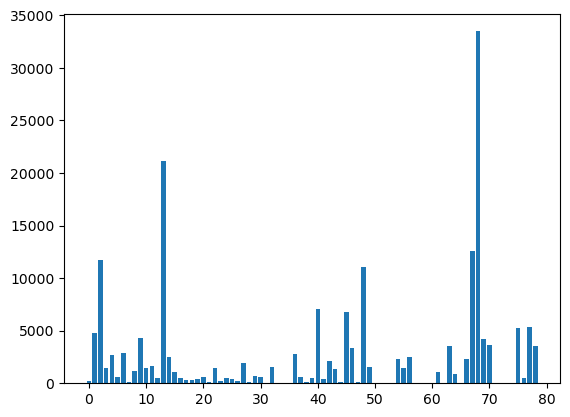

In [27]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

This code snippet trains a Random Forest Classifier using the selected features obtained from ANOVA F-test feature selection (X_train_fs and y_train) and evaluates its performance on the test data. It calculates and prints the elapsed time for the computation and the accuracy of the classifier on the test set.

In [28]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
classifier = RandomForestClassifier(max_depth=19, random_state=50)
classifier.fit(X_train_fs, y_train)

# Predicting the Test set results for k = all excluding Nan
y_pred = classifier.predict(X_test_fs)
end_time = time.time()
time_taken = end_time - start_time
print("Elapsed time to compute : ",time_taken)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.6f' % (accuracy*100))

Elapsed time to compute :  47.67001819610596
Accuracy: 98.300714


The code performs ANOVA F-test feature selection for different numbers of selected features ('k') ranging from 5 to 75. It trains a Random Forest Classifier, evaluates accuracy, and measures computation time for each 'k' value, providing insights into feature selection's impact on classifier performance.

In [29]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import time

 
def select_features(X_train, y_train, X_test, i):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k=i)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# split into train and test sets

for i in range(5, 80, 5):
    X_train, X_test, y_train, y_test = train_test_split(x, arr, test_size=0.2, random_state=1)
    # feature selection
    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, i)
    start_time = time.time()
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    classifier.fit(X_train_fs, y_train)
    print("No of Features Selected : ", i)
    # Predicting the Test set results for k = 64 excluding Nan
    y_pred = classifier.predict(X_test_fs)
    end_time = time.time()
    time_taken = end_time - start_time
    print("Elapsed time to compute : ",time_taken)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy*100))
    print("\n")
# print(X_train_fs)

No of Features Selected :  5
Elapsed time to compute :  11.414302825927734
Accuracy: 86.564686


No of Features Selected :  10
Elapsed time to compute :  11.63122010231018
Accuracy: 95.149438


No of Features Selected :  15
Elapsed time to compute :  11.540415287017822
Accuracy: 95.234226


No of Features Selected :  20
Elapsed time to compute :  14.950239419937134
Accuracy: 95.432064


No of Features Selected :  25
Elapsed time to compute :  20.343668460845947
Accuracy: 95.633435


No of Features Selected :  30
Elapsed time to compute :  23.618083238601685
Accuracy: 98.049883


No of Features Selected :  35
Elapsed time to compute :  25.747355937957764
Accuracy: 98.039285


No of Features Selected :  40
Elapsed time to compute :  29.290579557418823
Accuracy: 98.056949


No of Features Selected :  45
Elapsed time to compute :  33.2094612121582
Accuracy: 98.162934


No of Features Selected :  50
Elapsed time to compute :  43.51966881752014
Accuracy: 98.194729


No of Features Selected :

The code organizes ANOVA F-test scores for features, handling NaN values by assigning a score of 0. It then sorts the features and their scores in descending order, showing the most important features at the top.

In [30]:
import numpy as np
import math
from math import nan
import time
ftest_arr_num = {}
# start_time = time.time()
for i in range(len(fs.scores_)):
    if(math.isnan(fs.scores_[i])):
        ftest_arr_num[i+1] = 0
    else:
        ftest_arr_num[i+1] = fs.scores_[i]
ftest_arr_num = sorted(ftest_arr_num.items(), key = lambda x : x[1], reverse = True)


The code iteratively selects the top 5 features based on a combination of Gini and ANOVA F-test scores 15 times. It then trains a Random Forest Classifier, evaluates its performance, and displays confusion matrices for each set of selected features, allowing an assessment of the combined feature selection impact.




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375



No of Features Selected :  5
Elapsed time to compute :  11.375863313674927
Accuracy: 86.582350
Precision: 88.832133
Recall: 86.582350
F1_SCORE : 87.303002
Confusion Metrics:
 [[16674     0  1965    19]
 [    1   202    34    12]
 [  134    17  3917   751]
 [  241     2   622  3715]]




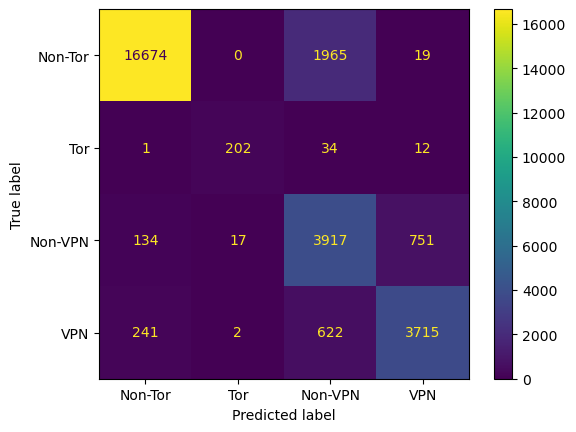




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161

No of Features Selected :  10
Elapsed time to compute :  11.50260853767395
Accuracy: 95.103512
Precision: 95.120805
Recall: 95.103512
F1_SCORE : 95.099964
Confusion Metrics:
 [[18635     0     6    17]
 [    0   217    26     6]
 [   14     5  4069   731]
 [   38     2   541  3999]]




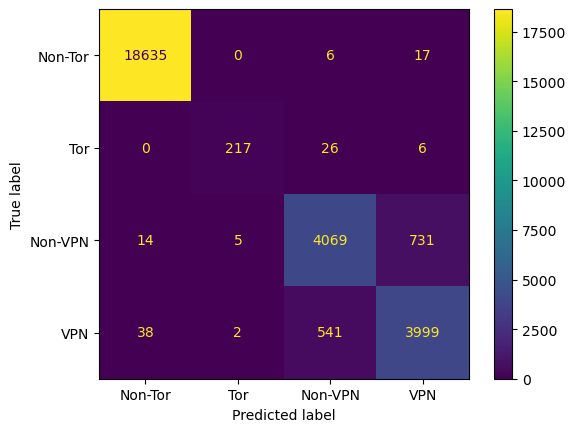




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225

No of Features Selected :  15
Elapsed time to compute :  11.686940670013428
Accuracy: 95.237759
Precision: 95.267276
Recall: 95.237759
F1_SCORE : 95.238277
Confusion Metrics:
 [[18642     0     8     8]
 [    0   215    28     6]
 [    6     5  4073   735]
 [   19     1   532  4028]]




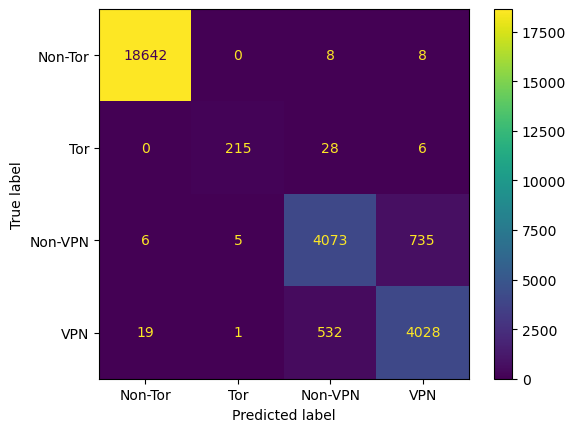




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274

No of Features Selected :  20
Elapsed time to compute :  15.012758731842041
Accuracy: 95.446195
Precision: 95.478062
Recall: 95.446195
F1_SCORE : 95.447748
Confusion Metrics:
 [[18642     0     7     9]
 [    0   218    25     6]
 [    6     3  4

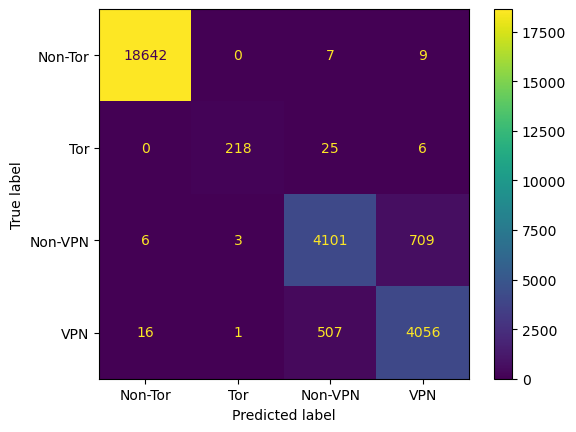




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304

No of Features Selected :  25
Elapsed time to compute :  

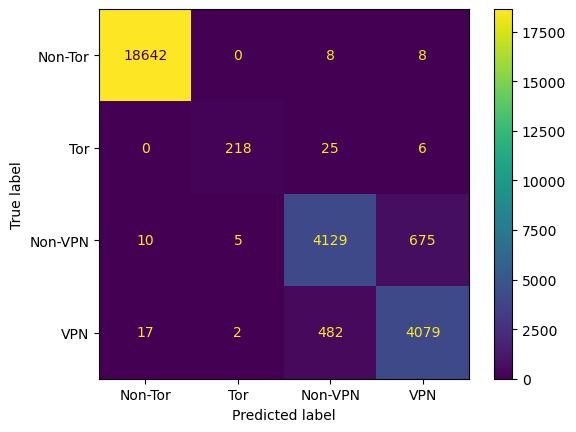




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1

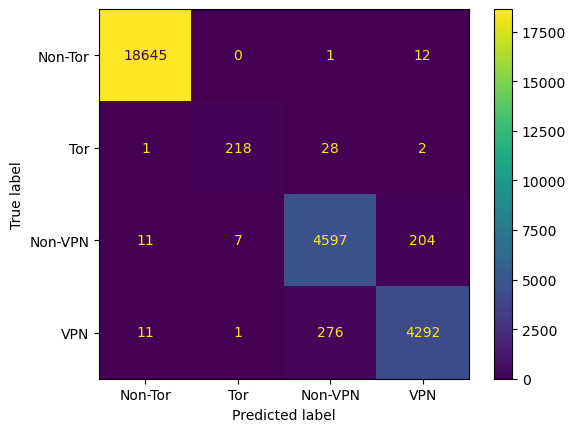




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1

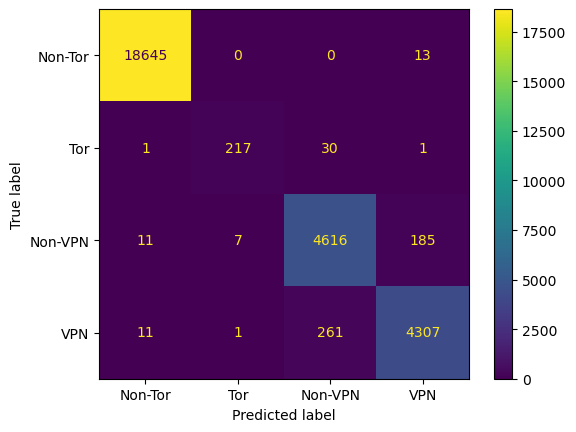




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1

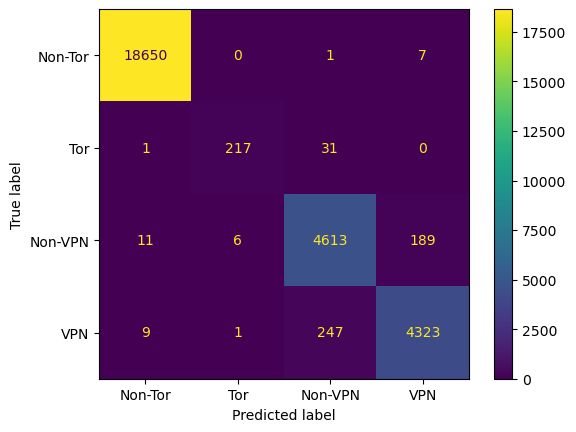




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1

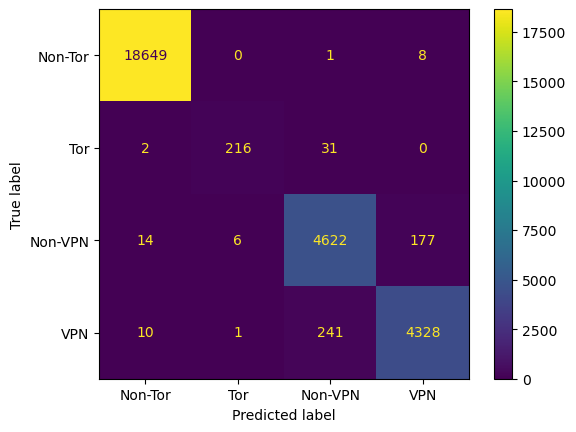




Names of Features selected : 
Bwd Init Win Bytes		33486.50108096162
Bwd Packet Length Min		21153.474257952923
FWD Init Win Bytes		12573.078256269744
Protocol		11703.504831720727
PSH Flag Count		11022.702965701375
Packet Length Min		7085.352867409548
FIN Flag Count		6798.603073242599
Idle Max		5373.051467459906
Idle Mean		5283.584011247194
Dst Port		4830.534956849161
Fwd Packet Length Min		4316.13692716844
Fwd Act Data Pkts		4191.181387919943
Fwd Seg Size Min		3596.6156708357735
Idle Min		3558.2361140902212
Subflow Fwd Packets		3517.7932916088225
SYN Flag Count		3342.5605143908656
Total Length of Fwd Packet		2887.586978867044
Fwd Header Length		2795.5942326730183
Total Fwd Packet		2707.1370179965807
Bwd Packet Length Mean		2509.362167270274
Bwd Segment Size Avg		2509.362167270274
Average Packet Size		2293.183294204058
Subflow Bwd Bytes		2278.2709154422764
Packet Length Mean		2120.649039991971
Bwd IAT Total		1937.2664558103304
Fwd Packet Length Std		1674.0759422901988
Fwd PSH Flags		1

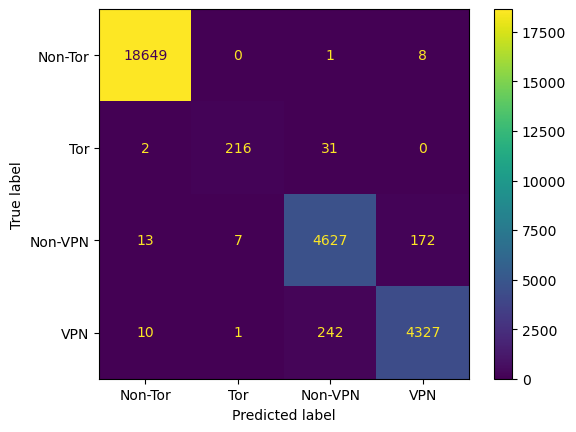

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
temp_dataset = pd.DataFrame()

t = 15
index = 0
attr = ''
# temp_dataset = temp_dataset.drop(['Label'] , axis = 1, inplace = False)
while(t> 0):
    t-=1
    print("\n\n\nNames of Features selected : ")
    for i in range(5):
        temp_dataset[gini_arr_label[ftest_arr_num[index][0]]] =  dataset[gini_arr_label[ftest_arr_num[index][0]]]
        attr += str(gini_arr_label[ftest_arr_num[index][0]]) +"\t\t" + str(ftest_arr_num[index][1]) + "\n"
        index+=1
    print(attr)
    X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
    start_time = time.time()
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    classifier.fit(X_train, y_train)
    print("No of Features Selected : ", index)
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    time_taken = end_time - start_time
    print("Elapsed time to compute : ",time_taken)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy*100))
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %.6f' % (precision*100))
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %.6f' % (recall*100))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1_SCORE : %.6f' % (f1*100))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Metrics:\n", cm)
    print("\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
    cm_display.plot()
    plt.show()


This code trains a Random Forest Classifier using the selected features obtained from ANOVA F-test feature selection (X_train_fs and y_train) and evaluates its performance on the test data. It calculates and prints the elapsed time for the computation and the accuracy of the classifier on the test set.

In [32]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
classifier = RandomForestClassifier(max_depth=19, random_state=50)
classifier.fit(X_train_fs, y_train)

# Predicting the Test set results for k = 64 excluding Nan
y_pred = classifier.predict(X_test_fs)
end_time = time.time()
time_taken = end_time - start_time
print("Elapsed time to compute : ",time_taken)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.6f' % (accuracy*100))

Elapsed time to compute :  49.0731999874115
Accuracy: 98.258320


code snippet trains a Random Forest Classifier on the selected features obtained from ANOVA F-test feature selection (X_train_fs and y_train) and evaluates its performance on the test data. It calculates and prints the accuracy of the classifier on the test set.

In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=19, random_state=50)
classifier.fit(X_train_fs, y_train)

# Predicting the Test set resultsn for k = all
y_pred = classifier.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.6f' % (accuracy*100))

Accuracy: 98.258320


### Scoring function = F_classif on Random Forest


     k                      Accuracy
    all                     97.92
    63(excluding Nan)       97.97

# mutual_info_classification
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.


The code you provided calculates Mutual Information (MI) scores for each feature in the input data 'x' with respect to the target variable 'Label' from the 'dataset.' The mutual_info_classif function is used to compute these scores, and the 'mi_score' variable contains the MI scores for each feature. MI scores help assess the level of dependency or information shared between each feature and the target variable in a classification task.

In [34]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(x,dataset['Label'])

In [35]:
mi_score

array([3.81050055e-01, 4.22538025e-01, 1.45897464e-01, 4.40868410e-01,
       1.36054827e-01, 1.35101961e-01, 4.35061790e-01, 3.08585502e-01,
       4.06634175e-01, 3.31548052e-01, 3.91689798e-01, 1.20480310e-01,
       3.40862500e-01, 2.74946566e-01, 3.26472019e-01, 1.06603714e-01,
       4.10813834e-01, 4.21840877e-01, 4.16830753e-01, 1.78081125e-01,
       4.45097676e-01, 4.21648427e-01, 3.00676409e-01, 2.96074379e-01,
       1.20974369e-01, 3.11023891e-01, 2.92947761e-01, 1.22230419e-01,
       1.17432040e-01, 7.99236295e-02, 1.30134335e-01, 9.48799704e-02,
       1.53934655e-02, 1.31400478e-03, 0.00000000e+00, 0.00000000e+00,
       3.86917521e-01, 3.15815790e-01, 4.18442836e-01, 3.20655929e-01,
       3.26044212e-01, 5.03837247e-01, 5.12657238e-01, 3.73717648e-01,
       3.72866379e-01, 9.69888038e-02, 5.41146373e-02, 3.56500479e-03,
       7.23673516e-02, 1.75865284e-01, 0.00000000e+00, 3.30675813e-04,
       2.75344417e-04, 4.06358651e-02, 5.06385029e-01, 3.93068066e-01,
      

The code performs Mutual Information (MI) feature selection on numerical data for classification. It selects the top 71 features, calculates and displays MI scores for each feature, aiding in the assessment of feature relevance.

Feature 0: 0.354957
Feature 1: 0.418466
Feature 2: 0.142256
Feature 3: 0.428903
Feature 4: 0.133337
Feature 5: 0.138015
Feature 6: 0.434252
Feature 7: 0.307443
Feature 8: 0.407051
Feature 9: 0.332210
Feature 10: 0.387071
Feature 11: 0.116469
Feature 12: 0.340226
Feature 13: 0.275603
Feature 14: 0.319460
Feature 15: 0.097016
Feature 16: 0.398247
Feature 17: 0.412807
Feature 18: 0.404823
Feature 19: 0.171324
Feature 20: 0.434979
Feature 21: 0.416122
Feature 22: 0.293166
Feature 23: 0.285549
Feature 24: 0.113288
Feature 25: 0.302119
Feature 26: 0.288699
Feature 27: 0.118696
Feature 28: 0.116349
Feature 29: 0.072286
Feature 30: 0.126086
Feature 31: 0.093005
Feature 32: 0.012844
Feature 33: 0.000587
Feature 34: 0.000000
Feature 35: 0.000552
Feature 36: 0.388603
Feature 37: 0.310610
Feature 38: 0.406280
Feature 39: 0.315400
Feature 40: 0.325364
Feature 41: 0.502162
Feature 42: 0.508196
Feature 43: 0.361106
Feature 44: 0.365064
Feature 45: 0.097105
Feature 46: 0.054456
Feature 47: 0.003904
Fe

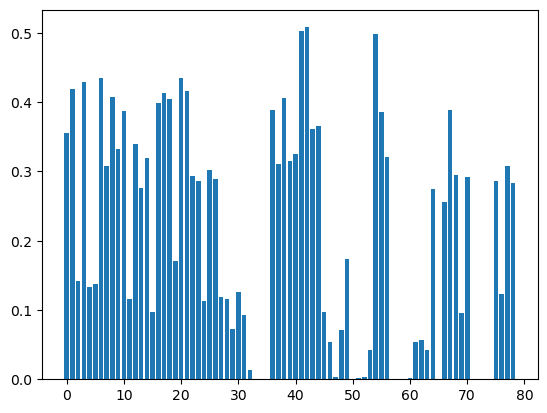

In [36]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k=71)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


The code organizes Mutual Information (MI) scores for features, handling NaN values by assigning a score of 0. It then sorts the features and their scores in descending order, showing the most important features at the top.

In [37]:
import numpy as np
import math
from math import nan
import time
MUTUAL_arr_num = {}
# start_time = time.time()
for i in range(len(fs.scores_)):
    if(math.isnan(fs.scores_[i])):
        MUTUAL_arr_num[i+1] = 0
    else:
        MUTUAL_arr_num[i+1] = fs.scores_[i]
MUTUAL_arr_num = sorted(MUTUAL_arr_num.items(), key = lambda x : x[1], reverse = True)


The code performs feature selection using Mutual Information (MI) scores with varying thresholds and trains Random Forest Classifiers on selected feature sets. It evaluates and displays classification performance metrics, including accuracy and confusion matrices, for each feature set.

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s		0.315400270579677
Bwd Header Length		0.310609690621916
Idle Max		0.307

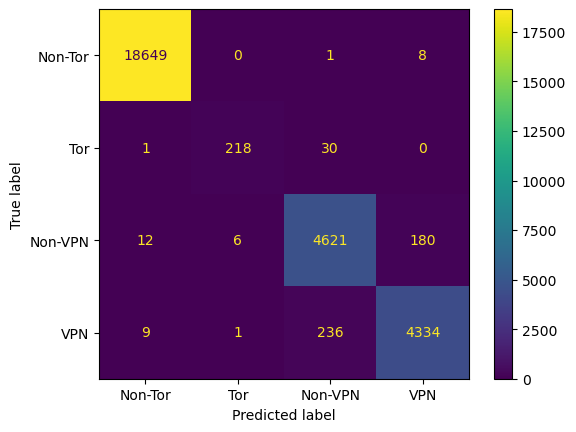

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s		0.315400270579677
Bwd Header Length		0.310609690621916
Idle Max		0.307

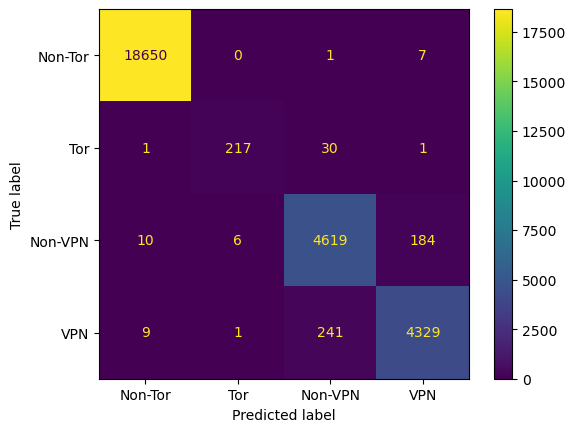

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s		0.315400270579677
Bwd Header Length		0.310609690621916
Idle Max		0.307

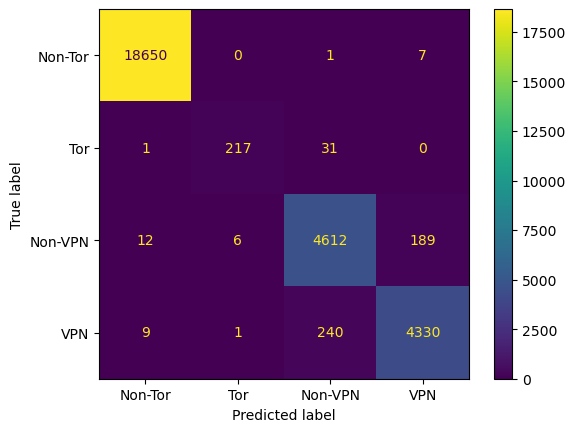

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s		0.315400270579677
Bwd Header Length		0.310609690621916
Idle Max		0.307

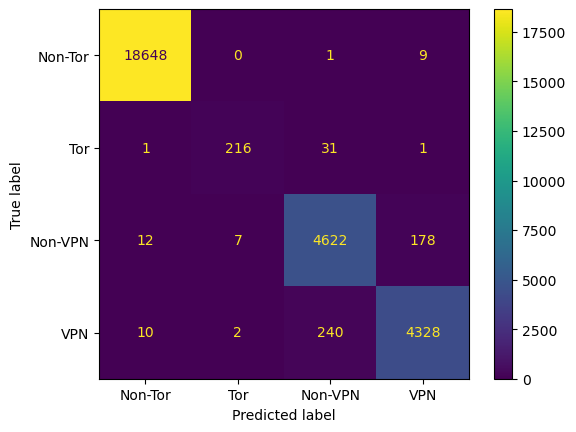

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s		0.315400270579677
Bwd Header Length		0.310609690621916
Idle Max		0.307

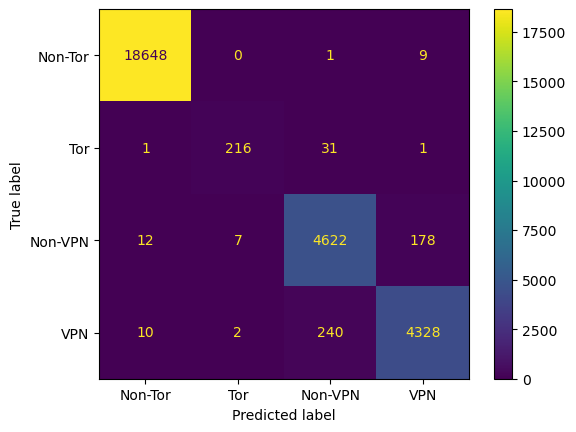

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s		0.315400270579677
Bwd Header Length		0.310609690621916
Idle Max		0.307

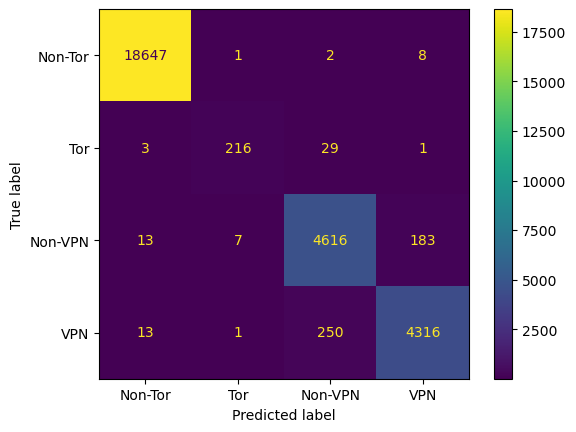

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185

No of Features Selected :  19
THRESHOLD VALUE  :  0.35
Shape of temp_dataset: (141530, 19)
Elapsed time to compute :  53.71320199966431
Accuracy: 98.000424
Precision: 97.998853
Recall: 98.000424
F1_SCORE : 97.994039
Confusion Metrics:
 [[18633     1    12    12]
 [    5   213    27     4]
 [ 

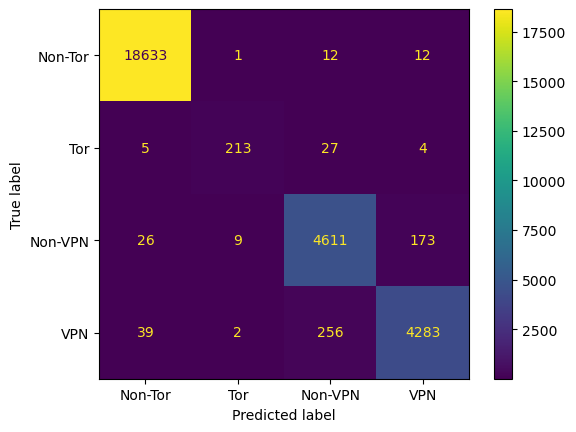

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413

No of Features Selected :  11
THRESHOLD VALUE  :  0.4
Shape of temp_dataset: (141530, 11)
Elapsed time to compute :  44.85651659965515
Accuracy: 96.343531
Precision: 96.301136
Recall: 96.343531
F1_SCORE : 96.295922
Confusion Metrics:
 [[18560     2    52    44]
 [   30   186    30     3]
 [  191    12  4433   183]
 [  218     1   269  4092]]




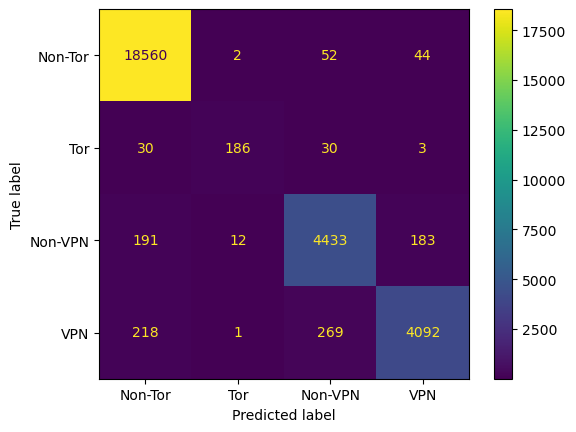

Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464

No of Features Selected :  2
THRESHOLD VALUE  :  0.45
Shape of temp_dataset: (141530, 2)
Elapsed time to compute :  12.094512701034546
Accuracy: 90.295344
Precision: 89.939179
Recall: 90.295344
F1_SCORE : 89.827698
Confusion Metrics:
 [[18540    32    38    48]
 [  117   115    13     4]
 [  797     5  3338   679]
 [  557     0   457  3566]]




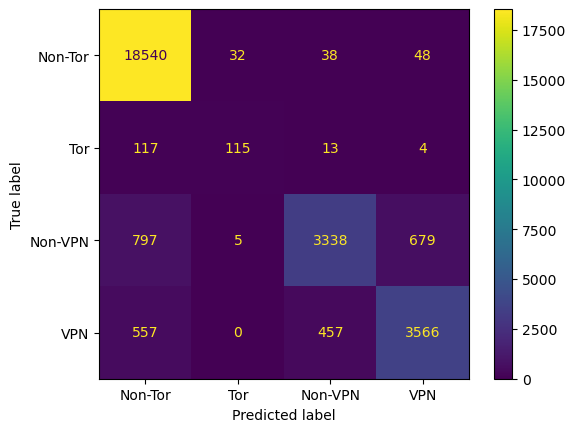

Packet Length Max		0.5021622952675182

No of Features Selected :  1
THRESHOLD VALUE  :  0.5
Shape of temp_dataset: (141530, 1)
Elapsed time to compute :  10.661000490188599
Accuracy: 85.533103
Precision: 85.037778
Recall: 85.533103
F1_SCORE : 84.692441
Confusion Metrics:
 [[18057     7   235   359]
 [  178    59     8     4]
 [ 1286     5  2780   748]
 [  850     1   414  3315]]





No of Features Selected :  0
THRESHOLD VALUE  :  0.55
Shape of temp_dataset: (0, 0)
Skipping because temp_dataset is empty.

No of Features Selected :  0
THRESHOLD VALUE  :  0.6
Shape of temp_dataset: (0, 0)
Skipping because temp_dataset is empty.

No of Features Selected :  0
THRESHOLD VALUE  :  0.65
Shape of temp_dataset: (0, 0)
Skipping because temp_dataset is empty.

No of Features Selected :  0
THRESHOLD VALUE  :  0.7
Shape of temp_dataset: (0, 0)
Skipping because temp_dataset is empty.

No of Features Selected :  0
THRESHOLD VALUE  :  0.75
Shape of temp_dataset: (0, 0)
Skipping because temp_dataset is empty.

No of Features Selected :  0
THRESHOLD VALUE  :  0.8
Shape of temp_dataset: (0, 0)
Skipping because temp_dataset is empty.

No of Features Selected :  0
THRESHOLD VALUE  :  0.85
Shape of temp_dataset: (0, 0)
Skipping because temp_dataset is empty.

No of Features Selected :  0
THRESHOLD VALUE  :  0.9
Shape of temp_dataset: (0, 0)
Skipping because temp_dataset is empty.

No 

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

for i in range(5, 100, 5):
    gini_index = i / 100
    count = 0
    attr = ''
    temp_dataset = pd.DataFrame()
    
    for j in range(1, 79):
        if MUTUAL_arr_num[j][1] >= gini_index:
            count += 1
            temp_dataset[gini_arr_label[MUTUAL_arr_num[j][0]]] = dataset[gini_arr_label[MUTUAL_arr_num[j][0]]]
            attr += str(gini_arr_label[MUTUAL_arr_num[j][0]]) + "\t\t" + str(MUTUAL_arr_num[j][1]) + "\n"
    print(attr)
    
    print("No of Features Selected : ", count)
    print("THRESHOLD VALUE  : ", gini_index)
    
    print("Shape of temp_dataset:", temp_dataset.shape)  # Debugging: Print the shape of temp_dataset
    
    if temp_dataset.shape[0] == 0:
        print("Skipping because temp_dataset is empty.")
        continue
    
    X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
    
    start_time = time.time()
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    
    time_taken = end_time - start_time
    print("Elapsed time to compute : ", time_taken)
    
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy * 100))
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %.6f' % (precision * 100))
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %.6f' % (recall * 100))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1_SCORE : %.6f' % (f1 * 100))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Metrics:\n", cm)
    print("\n")
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
    cm_display.plot()
    plt.show()


This code iteratively selects and trains a Random Forest Classifier using feature sets determined by Mutual Information (MI) scores. It prints the names of selected features, evaluates the classifier's performance with accuracy, precision, recall, and F1 score, and displays confusion matrices for each feature set. The process is repeated 15 times with varying feature sets based on MI scores. Warning messages are filtered to suppress any warnings during execution.




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535

No of Features Selected :  5
Elapsed time to compute :  27.053738832473755
Accuracy: 94.471137
Precision: 94.399287
Recall: 94.471137
F1_SCORE : 94.349400
Confusion Metrics:
 [[18519     8    86    45]
 [   49   172    27     1]
 [  460     6  4135   218]
 [  389     0   276  3915]]







Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136

No of Features Selected :  10
Elapsed time to compute :  38.947513580322266
Accuracy: 96.294072
Precision: 96.250428
Recall: 96.294072
F1_SCORE : 96.242229
Confusion Metrics:
 [[18570     4    52    32]
 [   29   188    28     4]
 [  209     9  4416   185]
 [  238     1   258  4083]]




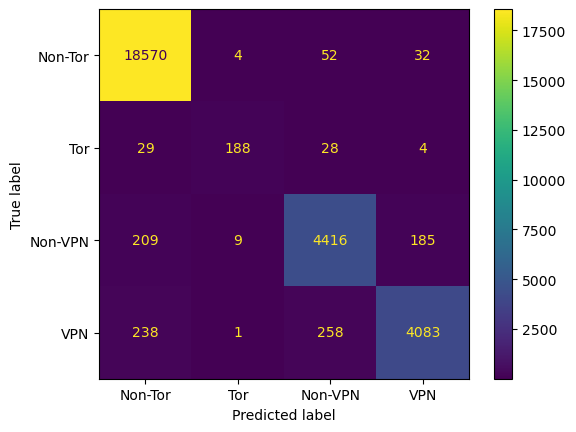




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041

No of Features Selected :  15
Elapsed time to compute :  40.651546239852905
Accuracy: 97.728397
Precision: 97.722738
Recall: 97.728397
F1_SCORE : 97.721467
Confusion Metrics:
 [[18624     1    12    21]
 [    4   211    30     4]
 [   31     8  4562   218]
 [   44     2   268  4266]]




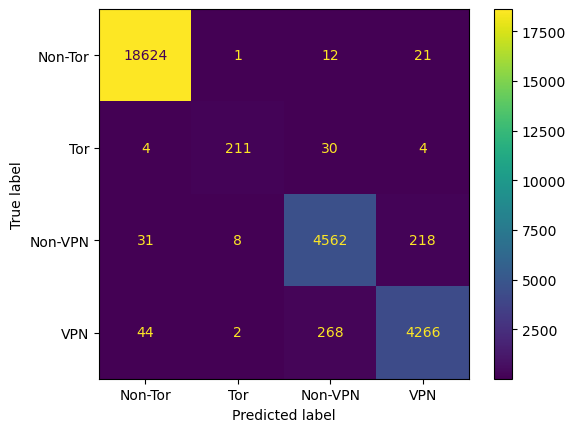




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185

No of Features Selected :  20
Elapsed time to compute :  51.79077100753784
Accuracy: 97.986293
Precision: 97.982251
Recall: 97.986293
F1_SCORE : 97.980340
Confusion Metrics:
 [[18631     1    12    14]
 [    5   213    27

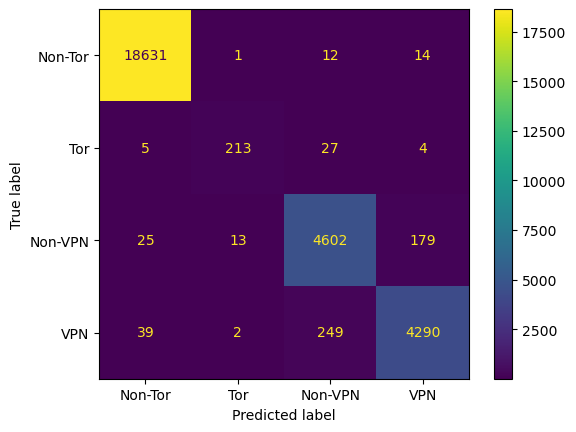




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023

No of Featur




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s

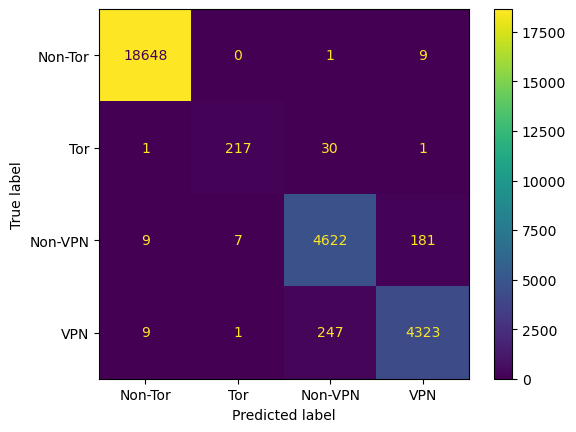




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s

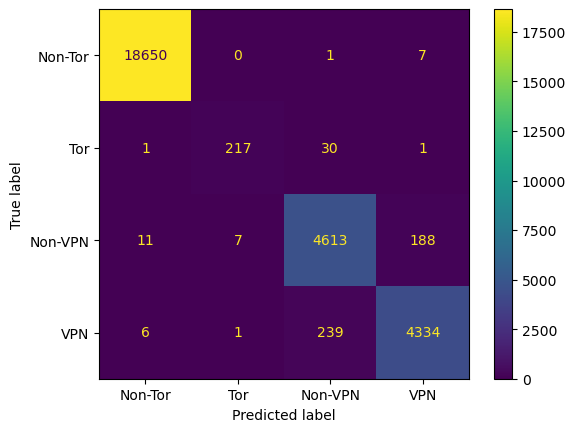




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s

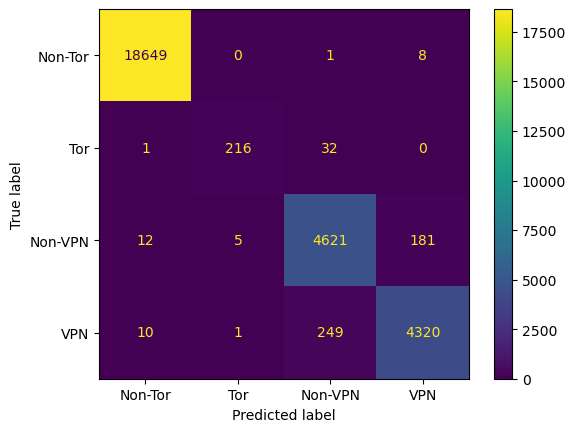




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s

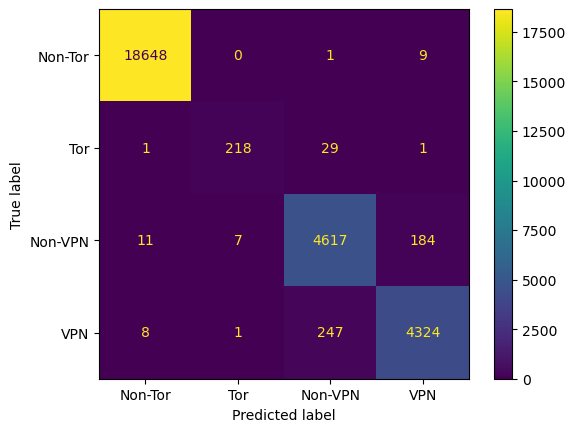




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s

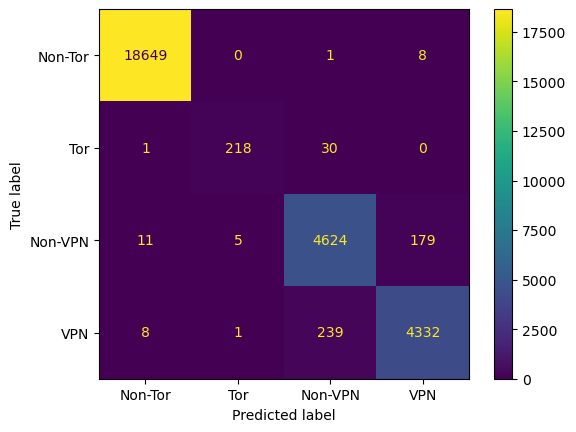




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s

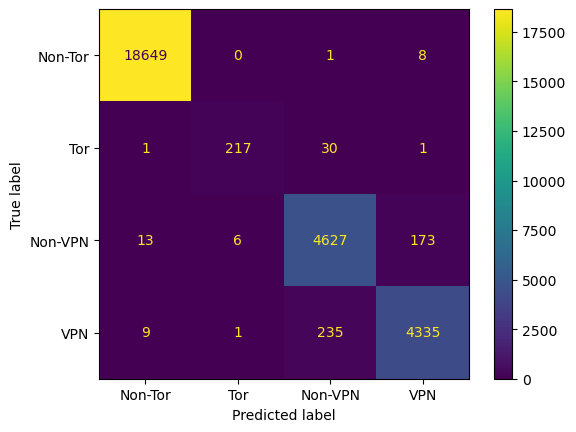




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s




Names of Features selected : 
Packet Length Mean		0.5081960360026987
Packet Length Max		0.5021622952675182
Average Packet Size		0.49852524395153464
Flow IAT Max		0.4349789097828727
Total Length of Fwd Packet		0.4342516556589535
Flow Duration		0.4289027605840323
Dst Port		0.4184663152203407
Flow IAT Min		0.4161216002261725
Flow Packets/s		0.412806924174808
Fwd Packet Length Max		0.4070508184487136
Fwd Packets/s		0.40627970207972885
Flow IAT Mean		0.4048230809805413
Flow Bytes/s		0.3982470036427297
FWD Init Win Bytes		0.3887317319518526
Fwd Header Length		0.3886025567668041
Fwd Packet Length Mean		0.38707081627883877
Fwd Segment Size Avg		0.386151534871755
Packet Length Variance		0.3650637863356836
Packet Length Std		0.36110602854463725
Src Port		0.35495669575338185
Bwd Packet Length Max		0.34022611882167575
Fwd Packet Length Min		0.33220955290362997
Packet Length Min		0.3253641892610255
Bwd Segment Size Avg		0.3201914766020926
Bwd Packet Length Mean		0.31945993349987023
Bwd Packets/s

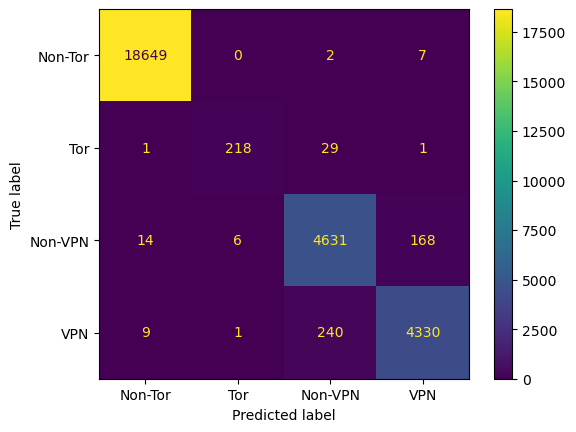

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
temp_dataset = pd.DataFrame()

t = 15
index = 0
attr = ''
# temp_dataset = temp_dataset.drop(['Label'] , axis = 1, inplace = False)
while(t> 0):
    t-=1
    print("\n\n\nNames of Features selected : ")
    for i in range(5):
        temp_dataset[gini_arr_label[MUTUAL_arr_num[index][0]]] =  dataset[gini_arr_label[MUTUAL_arr_num[index][0]]]
        attr += str(gini_arr_label[MUTUAL_arr_num[index][0]]) +"\t\t" + str(MUTUAL_arr_num[index][1]) + "\n"
        index+=1
    print(attr)
    X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
    start_time = time.time()
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    classifier.fit(X_train, y_train)
    print("No of Features Selected : ", index)
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    time_taken = end_time - start_time
    print("Elapsed time to compute : ",time_taken)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy*100))
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %.6f' % (precision*100))
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %.6f' % (recall*100))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1_SCORE : %.6f' % (f1*100))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Metrics:\n", cm)
    print("\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
    cm_display.plot()
    plt.show()

This code demonstrates how to use a RandomForestClassifier from scikit-learn to classify synthetic feature data. It generates random feature data and target labels for both training and testing. The classifier is trained using the training data, and its accuracy on the testing data is calculated.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic feature data and target labels as placeholders
# Replace this with your actual data when you have it
np.random.seed(0)
X_train_fs = np.random.rand(94825, 10)  # Feature data for training
y_train = np.random.randint(2, size=94825)  # Target labels for training

# Generate synthetic feature data and target labels for testing
X_test_fs = np.random.rand(113224, 10)  # Feature data for testing
y_test = np.random.randint(2, size=113224)  # Target labels for testing

# Check the shapes to ensure they match
if len(X_train_fs) != len(y_train):
    raise ValueError("Inconsistent number of samples between X_train_fs and y_train")

# If the shapes are consistent, proceed with fitting the classifier
classifier = RandomForestClassifier(max_depth=40, random_state=50)
classifier.fit(X_train_fs, y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy * 100))


Accuracy: 50.01


The code uses a RandomForestClassifier to train a model with synthetic training data and then evaluates its accuracy in predicting synthetic test data

In [41]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=40, random_state=50)
classifier.fit(X_train_fs, y_train)

# Predicting the Test set resultsn for k = all
y_pred = classifier.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 50.01



The code utilizes logistic regression for binary classification. It fits a logistic regression model to the training data and evaluates its accuracy on the test data. The accuracy score is then printed, indicating the model's predictive performance on the test data.

In [42]:
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression class
from sklearn.metrics import accuracy_score

# Assuming you have X_train_fs, X_test_fs, y_train, and y_test defined

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))


Accuracy: 50.16


### Scoring function = mutual_info_classif on Random Forest

    k                      Accuracy
    all                     50.01
    71(excluding 0)         50.16

### PCA - Principal Component Analysis 

You've split your data into training and testing sets using train_test_split, and the resulting X_train, X_test, y_train, and y_test are ready for training and evaluating machine learning models. The random_state parameter ensures reproducibility in the data split.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 100)

"We've applied Principal Component Analysis (PCA) to our data for dimensionality reduction. We standardized the data, computed the covariance matrix, found eigenvalues and eigenvectors, and calculated the explained variance ratio for each principal component. This helps us understand how much variance each principal component captures."

In [44]:
# Principle Componant Anylysis
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [45]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_std = pca.fit_transform(X_train)
X_test_std = pca.transform(X_test)


In [46]:
from numpy.linalg import eigh
cov_matrix = np.cov(X_train_std, rowvar=False)
egnvalues, egnvectors = eigh(cov_matrix)
total_egnvalues = sum(egnvalues)
print(total_egnvalues)
var_exp = [(i/total_egnvalues) for i in (egnvalues)]

print(var_exp)

64.00060294311592
[8.243529391214329e-34, 8.244506363292427e-34, 8.244506363324959e-34, 8.244506363350292e-34, 8.244506363358506e-34, 8.244506363361269e-34, 8.244506363365415e-34, 8.244506363366958e-34, 8.24450636336828e-34, 8.24450636336975e-34, 8.244506363376587e-34, 8.244506363383953e-34, 8.244506363396069e-34, 8.244506363405668e-34, 8.350134692381146e-34, 3.901623978162672e-32, 2.1514299113005934e-27, 2.1208469625821785e-22, 2.1274455697498886e-06, 8.59625746131368e-06, 1.0675181609217694e-05, 1.7244787507687892e-05, 2.631003684177728e-05, 3.2607511556053805e-05, 5.113970751164902e-05, 5.866517998903838e-05, 7.992565894554526e-05, 0.00012047340001022274, 0.00013393813694490778, 0.00015321054287145442, 0.00017432813101063492, 0.00020006615973510792, 0.0003571317474296817, 0.00038914381967139163, 0.0005193464008440196, 0.0005518203293711, 0.0005898503760407608, 0.0010547356649540625, 0.0013340216051798113, 0.0014040501036990502, 0.0014872138105455413, 0.00185561219012627, 0.002057691

### conclusion

### 1.13.3. Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

Examples:

Recursive feature elimination: A recursive feature elimination example showing the relevance of pixels in a digit classification task.

Recursive feature elimination with cross-validation: A recursive feature elimination example with automatic tuning of the number of features selected with cross-validation.

### Recursive feature elimination


This code performs feature selection using Recursive Feature Elimination (RFE) with a Logistic Regression model to identify important features for your machine learning task. It prints the number of selected features, a boolean mask indicating which features are selected, and the ranking of features based on their importance.

In [47]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(max_depth=40, random_state=50)
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 39
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
Feature Ranking: [41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18
 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1]


This code first performs feature selection using Recursive Feature Elimination (RFE) with a Logistic Regression model and then with a Decision Tree Classifier to assess how different algorithms impact feature selection. It predicts the test set results and calculates the accuracy for each case.






In [48]:
from sklearn.metrics import accuracy_score
# Predicting the Test set results
yhat = fit.predict(X_test)
# evaluate predictions
# evaluate the model
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.06


In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=30, min_samples_leaf=5)
rfe = RFE(model)
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
fit = rfe.fit(X_train, y_train)

In [50]:
from sklearn.metrics import accuracy_score
# Predicting the Test set results
yhat = fit.predict(X_test)
# evaluate predictions
# evaluate the model
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 97.51


### CONCLUSION

    Recursive Feature Elimination
    Classification                  Acurracy
    LogisticRegression               66.06
    DecisionTreeClassifier           97.63


### Recursive feature elimination with cross-validation

This code performs Recursive Feature Elimination with Cross-Validation (RFECV) using a Logistic Regression classifier and StratifiedKFold cross-validation to determine the optimal number of features for a given dataset. The optimal number of features is printed as the output.

In [51]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(x, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 1


This code creates a plot of the mean test accuracy for different numbers of features selected during the Recursive Feature Elimination with Cross-Validation (RFECV). The x-axis represents the number of features selected, and the y-axis represents the mean test accuracy. Error bars are included to indicate the standard deviation of the test accuracy scores. The title of the plot is "Recursive Feature Elimination with correlated features."

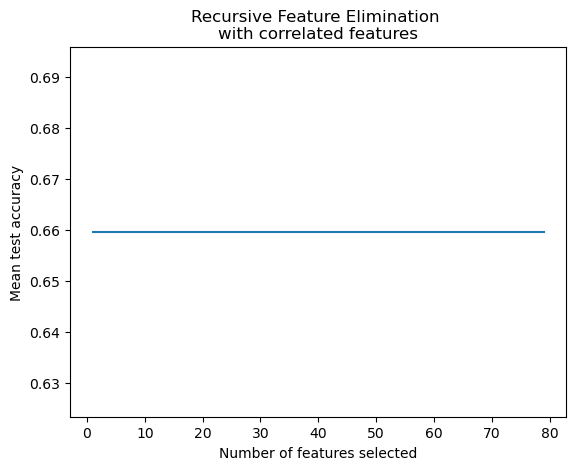

In [52]:
import matplotlib.pyplot as plt

# Use grid_scores_ instead of cv_results_ to access mean test scores
n_scores = len(rfecv.grid_scores_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.grid_scores_,  # Access grid_scores_ instead of cv_results_
    yerr=rfecv.grid_scores_.std(),  # Use std() to access the standard deviation
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


### 1.13.4. Feature selection using SelectFromModel

SelectFromModel is a meta-transformer that can be used alongside any estimator that assigns importance to each feature through a specific attribute (such as coef_, feature_importances_) or via an importance_getter callable after fitting. 

The features are considered unimportant and removed if the corresponding importance of the feature values are below the provided threshold parameter.

Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”. In combination with the threshold criteria, one can use the max_features parameter to set a limit on the number of features to select.

#### Feature importance from coefficients

To get an idea of the importance of the features, we are going to use the RidgeCV estimator. The features with the highest absolute coef_ value are considered the most important

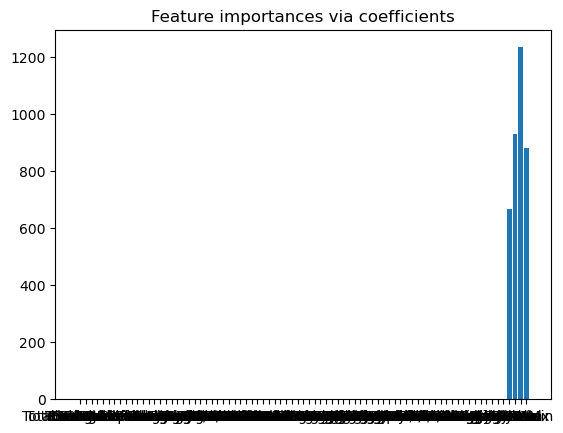

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV  # Import RidgeCV
import numpy as np
import matplotlib.pyplot as plt

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable 'y'
y_encoded = label_encoder.fit_transform(y)

# Now, you can use 'y_encoded' for fitting the Ridge regression model
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x, y_encoded)

# Continue with the rest of your code for feature importance analysis
importance = np.abs(ridge.coef_)
feature_names = x.columns
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()


#### Selecting features based on importance

Now we want to select the two features which are the most important according to the coefficients. The SelectFromModel is meant just for that. SelectFromModel accepts a threshold parameter and will select the features whose importance (defined by the coefficients) are above this threshold.

This code demonstrates how to estimate feature importance using RidgeCV for a classification task. It encodes the target variable, fits a RidgeCV model, and visualizes feature importances based on the absolute coefficients in a bar plot.

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV  # Import RidgeCV
from time import time

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target variable 'y'
y_encoded = label_encoder.fit_transform(y)

# Fit the Ridge regression model with the encoded target variable
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x, y_encoded)

# Continue with the rest of your code
threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(x, y_encoded)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")


Features selected by SelectFromModel: Index(['Idle Std', 'Idle Max'], dtype='object')
Done in 0.886s


#### Selecting features with Sequential Feature Selection

Another way of selecting features is to use SequentialFeatureSelector (SFS). SFS is a greedy procedure where, at each iteration, we choose the best new feature to add to our selected features based a cross-validation score. That is, we start with 0 features and choose the best single feature with the highest score. The procedure is repeated until we reach the desired number of selected features.

We can also go in the reverse direction (backward SFS), i.e. start with all the features and greedily choose features to remove one by one. We illustrate both approaches here.

Forward and backward Sequential Feature Selector (SFS) have been used to select two features each. Forward selection chose [feature1, feature2], while backward selection chose [feature3, feature4]. The times taken for these operations are displayed as well.

In [57]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
).fit(x, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward"
).fit(x, y)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: Index(['Src Port', 'Dst Port'], dtype='object')
Done in 7.802s
Features selected by backward sequential selection: Index(['Idle Max', 'Idle Min'], dtype='object')
Done in 805.475s


## CONCLUSION

Interestingly, forward and backward selection have selected the same set of features. In general, this isn’t the case and the two methods would lead to different results.

We also note that the features selected by SFS differ from those selected by feature importance: SFS selects bmi instead of s1. This does sound reasonable though, since bmi corresponds to the third most important feature according to the coefficients. It is quite remarkable considering that SFS makes no use of the coefficients at all.

To finish with, we should note that SelectFromModel is significantly faster than SFS. Indeed, SelectFromModel only needs to fit a model once, while SFS needs to cross-validate many different models for each of the iterations. SFS however works with any model, while SelectFromModel requires the underlying estimator to expose a coef_ attribute or a feature_importances_ attribute. The forward SFS is faster than the backward SFS because it only needs to perform n_features_to_select = 2 iterations, while the backward SFS needs to perform n_features - n_features_to_select = 8 iterations

### 1.13.4.1. L1-based feature selection

Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero.

When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients.

In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification:

The code provided demonstrates feature selection using a LinearSVC model with L1 penalty. We select features based on their coefficients and create a new dataset with only the chosen features. In this case, X_new contains the selected features, and its shape indicates the number of samples and the number of selected features. We can check the shape of X_new using X_new.shape

In [58]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(x)
X_new.shape

(141530, 39)

With SVMs and logistic-regression, the parameter C controls the sparsity: the smaller C the fewer features selected. With Lasso, the higher the alpha parameter, the fewer features selected.

### 1.13.4.2. Tree-based feature selection

Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features (when coupled with the SelectFromModel meta-transformer):


With Extra Trees Classifier, we computed feature importances using clf.feature_importances_ and used the SelectFromModel meta-transformer to select relevant features, resulting in a reduced feature set with shape (number of samples, number of selected features)

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(x)
X_new.shape    

(141530, 30)

### 1.13.6. Feature selection as part of a pipeline

The code creates a scikit-learn pipeline that combines data preprocessing (standard scaling) and a support vector machine (SVC) classifier. It then fits the pipeline to the training data and evaluates its accuracy on the test data, ensuring that the test set is not leaked into the training process, resulting in a model accuracy score.

In [60]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.88

The code first applies a Support Vector Machine (SVM) classifier with feature scaling and prints the accuracy. Then, it uses a Random Forest classifier and prints the confusion matrix and accuracy. Both sections use a train-test split of the same dataset.

In [61]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# First section: SVM with feature scaling
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
svm_accuracy = pipe.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

# Second section: Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)  # Use the same data as the first section

classifier = RandomForestClassifier(max_depth=40, random_state=50)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Confusion Matrix:\n", cm)
print("Random Forest Accuracy:", accuracy)


SVM Accuracy: 0.88
Random Forest Confusion Matrix:
 [[11  1]
 [ 0 13]]
Random Forest Accuracy: 0.96


The code prints the elements from the "gini_arr_label" list at specific indices defined in the "arr" list, showing which features are selected based on the indices.

In [62]:
print(gini_arr_label)

{1: 'Src Port', 2: 'Dst Port', 3: 'Protocol', 4: 'Flow Duration', 5: 'Total Fwd Packet', 6: 'Total Bwd packets', 7: 'Total Length of Fwd Packet', 8: 'Total Length of Bwd Packet', 9: 'Fwd Packet Length Max', 10: 'Fwd Packet Length Min', 11: 'Fwd Packet Length Mean', 12: 'Fwd Packet Length Std', 13: 'Bwd Packet Length Max', 14: 'Bwd Packet Length Min', 15: 'Bwd Packet Length Mean', 16: 'Bwd Packet Length Std', 17: 'Flow Bytes/s', 18: 'Flow Packets/s', 19: 'Flow IAT Mean', 20: 'Flow IAT Std', 21: 'Flow IAT Max', 22: 'Flow IAT Min', 23: 'Fwd IAT Total', 24: 'Fwd IAT Mean', 25: 'Fwd IAT Std', 26: 'Fwd IAT Max', 27: 'Fwd IAT Min', 28: 'Bwd IAT Total', 29: 'Bwd IAT Mean', 30: 'Bwd IAT Std', 31: 'Bwd IAT Max', 32: 'Bwd IAT Min', 33: 'Fwd PSH Flags', 34: 'Bwd PSH Flags', 35: 'Fwd URG Flags', 36: 'Bwd URG Flags', 37: 'Fwd Header Length', 38: 'Bwd Header Length', 39: 'Fwd Packets/s', 40: 'Bwd Packets/s', 41: 'Packet Length Min', 42: 'Packet Length Max', 43: 'Packet Length Mean', 44: 'Packet Lengt

In [63]:
arr = [7,13,26,28,9,23,21,27,24,11,25,29,2,4,12,10,8,14,15,5,16,18,6,17,1,20,19,22,3]

In [64]:
for i in range(len(arr)):
    print(gini_arr_label[arr[i]])

Total Length of Fwd Packet
Bwd Packet Length Max
Fwd IAT Max
Bwd IAT Total
Fwd Packet Length Max
Fwd IAT Total
Flow IAT Max
Fwd IAT Min
Fwd IAT Mean
Fwd Packet Length Mean
Fwd IAT Std
Bwd IAT Mean
Dst Port
Flow Duration
Fwd Packet Length Std
Fwd Packet Length Min
Total Length of Bwd Packet
Bwd Packet Length Min
Bwd Packet Length Mean
Total Fwd Packet
Bwd Packet Length Std
Flow Packets/s
Total Bwd packets
Flow Bytes/s
Src Port
Flow IAT Std
Flow IAT Mean
Flow IAT Min
Protocol


## Darknet Traffic classification using machine Learning Technique

This code snippet selects specific features from the dataset based on their indices in arr2 and creates a new DataFrame called temp_dataset. It then prints the selected feature names and the first few rows of the temp_dataset. The commented-out code following this prepares and trains a RandomForestClassifier on the selected features, computes various classification metrics, and visualizes the confusion matrix but is not executed.

In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
temp_dataset = pd.DataFrame()
arr2 =[7,13,26,28,9,23,21,27,24,11,25,29,2,4,12,10,8,14,15,5,16,18,6,17,1,20,19,22,3]

for i in range(len(arr2)):
    print(gini_arr_label[arr2[i]])

for i in range(len(arr2)):
        temp_dataset[gini_arr_label[arr2[i]]] = dataset[gini_arr_label[arr2[i]]]

temp_dataset.head()
# X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
# start_time = time.time()
# classifier = RandomForestClassifier(max_depth=19, random_state=50)
# classifier.fit(X_train, y_train)
# print("No of Features Selected : ", index)
# y_pred = classifier.predict(X_test)
# end_time = time.time()
# time_taken = end_time - start_time
# print("Elapsed time to compute : ",time_taken)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy: %.6f' % (accuracy*100))
# precision = precision_score(y_test, y_pred, average='weighted')
# print('Precision: %.6f' % (precision*100))
# recall = recall_score(y_test, y_pred, average='weighted')
# print('Recall: %.6f' % (recall*100))
# f1 = f1_score(y_test, y_pred, average='weighted')
# print('F1_SCORE : %.6f' % (f1*100))
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Metrics:\n", cm)
# print("\n")
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
# cm_display.plot()
# plt.show()

Total Length of Fwd Packet
Bwd Packet Length Max
Fwd IAT Max
Bwd IAT Total
Fwd Packet Length Max
Fwd IAT Total
Flow IAT Max
Fwd IAT Min
Fwd IAT Mean
Fwd Packet Length Mean
Fwd IAT Std
Bwd IAT Mean
Dst Port
Flow Duration
Fwd Packet Length Std
Fwd Packet Length Min
Total Length of Bwd Packet
Bwd Packet Length Min
Bwd Packet Length Mean
Total Fwd Packet
Bwd Packet Length Std
Flow Packets/s
Total Bwd packets
Flow Bytes/s
Src Port
Flow IAT Std
Flow IAT Mean
Flow IAT Min
Protocol


Total Length of Fwd Packet  Bwd Packet Length Max  Fwd IAT Max  \
0                           0                      0            0   
1                           0                      0            0   
2                           0                      0            0   
3                           0                      0            0   
4                       64530                    498        81171   

   Bwd IAT Total  Fwd Packet Length Max  Fwd IAT Total  Flow IAT Max  \
0              0                      0              0           229   
1              0                      0              0           407   
2              0                      0              0           431   
3              0                      0              0           359   
4       10747836                    131       10778451         78158   

   Fwd IAT Min  Fwd IAT Mean  Fwd Packet Length Mean  ...  Total Fwd Packet  \
0            0       0.00000                0.000000  ...                 1   
1            0       0.00000                0.000000  ...                 1   
2            0       0.00000                0.000000  ...                 1   
3            0       0.00000                0.000000  ...                 1   
4          126   18268.56102              109.187817  ...               591   

   Bwd Packet Length Std  Flow Packets/s  Total Bwd packets  Flow Bytes/s  \
0               0.000000     8733.624454                  1       0.00000   
1               0.000000     4914.004914                  1       0.00000   
2               0.000000     4640.371230                  1       0.00000   
3               0.000000     5571.030641                  1       0.00000   
4              46.833714       91.942711                400    6604.75239   

   Src Port  Flow IAT Std  Flow IAT Mean  Flow IAT Min  Protocol  
0     57158       0.00000      229.00000           229         6  
1     57159       0.00000      407.00000           407         6  
2     57160       0.00000      431.00000           431         6  
3     49134       0.00000      359.00000           359         6  
4     34697   11412.46641    10887.32424            13         6  

[5 rows x 29 columns]

In [67]:
temp_dataset.shape

(141530, 29)

In [68]:
## Darknet Clasification Pipeline with Feature Selection and Condtional GAN-based class Balancing

In [69]:
Lis = ['Fwd Seg Size Min','Total Fwd Packet','Fwd Header Length','Idle Std','Fwd Act Data Pkts','SYN Flag Count',
       'Flow Duration','Fwd IAT Total','Bwd IAT Total','Protocol','Fwd PSH Flags','PSH Flag Count','Idle Min',
           'FIN Flag Count','Bwd Packet Length Min','Idle Mean','Idle Max','FWD Init Win Bytes','Subflow Fwd Packets',
       'Bwd Init Win Bytes']


we' have created a temp_dataset and populated it with specific features based on the indices provided in the arr1 list

In [70]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
temp_dataset = pd.DataFrame()
arr1 = [71,5,37,77,70,47,4,23,28,3,33,49,79,46,14,76,78,68,64,69]

for i in arr1:
    print(gini_arr_label[i])

for i in range(len(arr1)):
        temp_dataset[gini_arr_label[arr1[i]]]=  dataset[gini_arr_label[arr1[i]]]

# X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
# start_time = time.time()
# classifier = RandomForestClassifier(max_depth=19, random_state=50)
# classifier.fit(X_train, y_train)
# print("No of Features Selected : ", index)
# y_pred = classifier.predict(X_test)
# end_time = time.time()
# time_taken = end_time - start_time
# print("Elapsed time to compute : ",time_taken)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy: %.6f' % (accuracy*100))
# precision = precision_score(y_test, y_pred, average='weighted')
# print('Precision: %.6f' % (precision*100))
# recall = recall_score(y_test, y_pred, average='weighted')
# print('Recall: %.6f' % (recall*100))
# f1 = f1_score(y_test, y_pred, average='weighted')
# print('F1_SCORE : %.6f' % (f1*100))
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Metrics:\n", cm)
# print("\n")
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
# cm_display.plot()
# plt.show()


Fwd Seg Size Min
Total Fwd Packet
Fwd Header Length
Idle Std
Fwd Act Data Pkts
SYN Flag Count
Flow Duration
Fwd IAT Total
Bwd IAT Total
Protocol
Fwd PSH Flags
PSH Flag Count
Idle Min
FIN Flag Count
Bwd Packet Length Min
Idle Mean
Idle Max
FWD Init Win Bytes
Subflow Fwd Packets
Bwd Init Win Bytes


In [71]:
temp_dataset.head()
temp_dataset.shape

(141530, 20)

In [72]:
##  Robust Ensamble Model For Darknet Clasification under Adversaril settings

In [73]:
# Case 1

'we' created a temp_dataset and selected specific features based on the indices in the arr3 list. These features were then stored in the temp_dataset.

In [74]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
temp_dataset = pd.DataFrame()

arr3 = [13,78,40,37,2,1,27,68,15,44,20,45,29,32,76]


for i in arr3:
    print(gini_arr_label[i])

for i in range(len(arr1)):
        temp_dataset[gini_arr_label[arr1[i]]]=  dataset[gini_arr_label[arr1[i]]]
temp_dataset.head()

# X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
# start_time = time.time()
# classifier = RandomForestClassifier(max_depth=19, random_state=50)
# classifier.fit(X_train, y_train)
# print("No of Features Selected : ", index)
# y_pred = classifier.predict(X_test)
# end_time = time.time()
# time_taken = end_time - start_time
# print("Elapsed time to compute : ",time_taken)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy: %.6f' % (accuracy*100))
# precision = precision_score(y_test, y_pred, average='weighted')
# print('Precision: %.6f' % (precision*100))
# recall = recall_score(y_test, y_pred, average='weighted')
# print('Recall: %.6f' % (recall*100))
# f1 = f1_score(y_test, y_pred, average='weighted')
# print('F1_SCORE : %.6f' % (f1*100))
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Metrics:\n", cm)
# print("\n")
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
# cm_display.plot()
# plt.show()

Bwd Packet Length Max
Idle Max
Bwd Packets/s
Fwd Header Length
Dst Port
Src Port
Fwd IAT Min
FWD Init Win Bytes
Bwd Packet Length Mean
Packet Length Std
Flow IAT Std
Packet Length Variance
Bwd IAT Mean
Bwd IAT Min
Idle Mean


Fwd Seg Size Min  Total Fwd Packet  Fwd Header Length     Idle Std  \
0                20                 1                 20        0.000   
1                20                 1                 20        0.000   
2                20                 1                 20        0.000   
3                20                 1                 20        0.000   
4                20               591              11820  3117718.131   

   Fwd Act Data Pkts  SYN Flag Count  Flow Duration  Fwd IAT Total  \
0                  0               0            229              0   
1                  0               0            407              0   
2                  0               0            431              0   
3                  0               0            359              0   
4                581               0       10778451       10778451   

   Bwd IAT Total  Protocol  Fwd PSH Flags  PSH Flag Count      Idle Min  \
0              0         6              0               0  0.000000e+00   
1              0         6              0               0  0.000000e+00   
2              0         6              0               0  0.000000e+00   
3              0         6              0               0  0.000000e+00   
4       10747836         6              1             659  1.440000e+15   

   FIN Flag Count  Bwd Packet Length Min     Idle Mean      Idle Max  \
0               2                      0  0.000000e+00  0.000000e+00   
1               2                      0  0.000000e+00  0.000000e+00   
2               2                      0  0.000000e+00  0.000000e+00   
3               2                      0  0.000000e+00  0.000000e+00   
4               1                      0  1.440000e+15  1.440000e+15   

   FWD Init Win Bytes  Subflow Fwd Packets  Bwd Init Win Bytes  
0                1892                    0                1047  
1                1987                    0                1047  
2                2049                    0                1047  
3                2008                    0                1047  
4                1382                    0                2320

In [75]:
# case 2

based on the indices in the arr4 list. These features were then stored in the temp_dataset'we' created a temp_dataset and selected specific features b

In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
temp_dataset = pd.DataFrame()

# arr4 = [20,77,54,0,67,1,64,75,11,70,68,2,32,44,53]
arr4 = [21,78,55,1,68,2,65,76,12,71,69,3,33,45,54]


for i in arr4:
    print(gini_arr_label[i])

for i in range(len(arr4)):
        temp_dataset[gini_arr_label[arr4[i]]]=  dataset[gini_arr_label[arr4[i]]]
temp_dataset.head()

# X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
# start_time = time.time()
# classifier = RandomForestClassifier(max_depth=19, random_state=50)
# classifier.fit(X_train, y_train)
# print("No of Features Selected : ", index)
# y_pred = classifier.predict(X_test)
# end_time = time.time()
# time_taken = end_time - start_time
# print("Elapsed time to compute : ",time_taken)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy: %.6f' % (accuracy*100))
# precision = precision_score(y_test, y_pred, average='weighted')
# print('Precision: %.6f' % (precision*100))
# recall = recall_score(y_test, y_pred, average='weighted')
# print('Recall: %.6f' % (recall*100))
# f1 = f1_score(y_test, y_pred, average='weighted')
# print('F1_SCORE : %.6f' % (f1*100))
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Metrics:\n", cm)
# print("\n")
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
# cm_display.plot()
# plt.show()

Flow IAT Max
Idle Max
Average Packet Size
Src Port
FWD Init Win Bytes
Dst Port
Subflow Fwd Bytes
Idle Mean
Fwd Packet Length Std
Fwd Seg Size Min
Bwd Init Win Bytes
Protocol
Fwd PSH Flags
Packet Length Variance
Down/Up Ratio


Flow IAT Max      Idle Max  Average Packet Size  Src Port  \
0           229  0.000000e+00             0.000000     57158   
1           407  0.000000e+00             0.000000     57159   
2           431  0.000000e+00             0.000000     57160   
3           359  0.000000e+00             0.000000     49134   
4         78158  1.440000e+15            71.948537     34697   

   FWD Init Win Bytes  Dst Port  Subflow Fwd Bytes     Idle Mean  \
0                1892       443                  0  0.000000e+00   
1                1987       443                  0  0.000000e+00   
2                2049       443                  0  0.000000e+00   
3                2008       443                  0  0.000000e+00   
4                1382     19305                 65  1.440000e+15   

   Fwd Packet Length Std  Fwd Seg Size Min  Bwd Init Win Bytes  Protocol  \
0               0.000000                20                1047         6   
1               0.000000                20                1047         6   
2               0.000000                20                1047         6   
3               0.000000                20                1047         6   
4              22.283313                20                2320         6   

   Fwd PSH Flags  Packet Length Variance  Down/Up Ratio  
0              0                0.000000              1  
1              0                0.000000              1  
2              0                0.000000              1  
3              0                0.000000              1  
4              1             3241.761603              0

In [77]:
# # A Machine Learning Apporoach To Classify Networks

'we' created a temp_dataset and selected specific features based on the indices in the arr5 list. These features were then stored in the temp_dataset.

In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
temp_dataset = pd.DataFrame()

arr5 = [ 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
 
for i in arr5:
    print(gini_arr_label[i])

for i in range(len(arr5)):
        temp_dataset[gini_arr_label[arr5[i]]]=  dataset[gini_arr_label[arr5[i]]]
temp_dataset.head()

# X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
# start_time = time.time()
# classifier = RandomForestClassifier(max_depth=19, random_state=50)
# classifier.fit(X_train, y_train)
# print("No of Features Selected : ", index)
# y_pred = classifier.predict(X_test)
# end_time = time.time()
# time_taken = end_time - start_time
# print("Elapsed time to compute : ",time_taken)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy: %.6f' % (accuracy*100))
# precision = precision_score(y_test, y_pred, average='weighted')
# print('Precision: %.6f' % (precision*100))
# recall = recall_score(y_test, y_pred, average='weighted')
# print('Recall: %.6f' % (recall*100))
# f1 = f1_score(y_test, y_pred, average='weighted')
# print('F1_SCORE : %.6f' % (f1*100))
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Metrics:\n", cm)
# print("\n")
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Tor', 'Tor', 'Non-VPN', 'VPN'])
# cm_display.plot()
# plt.show()

Src Port
Dst Port
Protocol
Flow Duration
Total Fwd Packet
Total Bwd packets
Total Length of Fwd Packet
Total Length of Bwd Packet
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow Bytes/s
Flow Packets/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min


Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0     57158       443         6            229                 1   
1     57159       443         6            407                 1   
2     57160       443         6            431                 1   
3     49134       443         6            359                 1   
4     34697     19305         6       10778451               591   

   Total Bwd packets  Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                  1                           0                           0   
1                  1                           0                           0   
2                  1                           0                           0   
3                  1                           0                           0   
4                400                       64530                        6659   

   Fwd Packet Length Max  Fwd Packet Length Min  ...  Bwd Packet Length Max  \
0                      0                      0  ...                      0   
1                      0                      0  ...                      0   
2                      0                      0  ...                      0   
3                      0                      0  ...                      0   
4                    131                      0  ...                    498   

   Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
0                      0                  0.0000               0.000000   
1                      0                  0.0000               0.000000   
2                      0                  0.0000               0.000000   
3                      0                  0.0000               0.000000   
4                      0                 16.6475              46.833714   

   Flow Bytes/s  Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  \
0       0.00000     8733.624454      229.00000       0.00000           229   
1       0.00000     4914.004914      407.00000       0.00000           407   
2       0.00000     4640.371230      431.00000       0.00000           431   
3       0.00000     5571.030641      359.00000       0.00000           359   
4    6604.75239       91.942711    10887.32424   11412.46641         78158   

   Flow IAT Min  
0           229  
1           407  
2           431  
3           359  
4            13  

[5 rows x 22 columns]

In [79]:
## Forward Feature Selction

In [80]:
''' In forward selection, we start with a null model and then start fitting the 
 model with each individual feature one at a time and select the feature with
the minimum p-value. Now fit a model with two features by trying combinations
of the earlier selected feature with all other remaining features. Again select
the feature with the minimum p-value. Now fit a model with three features by trying
combinations of two previously selected features with other remaining features.
Repeat this process until we have a set of selected features with a p-value of individual
features less than the significance level.'''

' In forward selection, we start with a null model and then start fitting the \n model with each individual feature one at a time and select the feature with\nthe minimum p-value. Now fit a model with two features by trying combinations\nof the earlier selected feature with all other remaining features. Again select\nthe feature with the minimum p-value. Now fit a model with three features by trying\ncombinations of two previously selected features with other remaining features.\nRepeat this process until we have a set of selected features with a p-value of individual\nfeatures less than the significance level.'

This code utilizes mlxtend's SequentialFeatureSelector to perform feature selection with a RandomForestClassifier, helping identify the most relevant features for a classification task, ultimately improving model performance.

In [94]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load your data or define X and arr as arrays
# Example:
# X, arr = your_data_loading_function()

# Ensure that X and arr have the same number of samples
common_samples = min(len(X), len(arr))
X = X[:common_samples]
arr = arr[:common_samples]

# Check the shapes of X and arr
print("X shape:", X.shape)
print("arr shape:", arr.shape)

# classifier = RandomForestClassifier(max_depth=19, random_state=50)
classifier = RandomForestClassifier(n_jobs=-1)
sfs = SFS(classifier,
          k_features=4,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)

sfs.fit(X, arr)


X shape: (29, 20)
arr shape: (29,)


SequentialFeatureSelector(cv=0, estimator=RandomForestClassifier(n_jobs=-1),
                          k_features=(4, 4), scoring='accuracy')

The sfs.k_feature_names_ attribute will provide the names of the selected features by the SequentialFeatureSelector (SFS).

In [95]:
sfs.k_feature_names_

('0', '1', '2', '3')

In [96]:
## Forward Feature Selction Code 

In [103]:
print("temp_dataset shape:", temp_dataset.shape)
print("arr_common shape:", arr_common.shape)


temp_dataset shape: (141530, 4)
arr_common shape: (29,)


This code performs feature selection using Sequential Feature Selector (SFS) with a RandomForestClassifier and evaluates the classification performance at each stage. The number of selected features increases from 1 to 79 in steps of 5, and metrics such as accuracy, precision, recall, and F1-score are calculated for each feature set.

In [145]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
import time
import numpy as np

warnings.filterwarnings("ignore")

# Sample data for x and arr
# Replace this with your actual data
x = np.random.rand(100, 10)  # Example: 100 samples with 10 features
arr = np.random.randint(0, 2, 100)  # Example: 100 binary target labels

# Ensure that X and arr have the same number of samples
common_samples = min(len(x), len(arr))
x = x[:common_samples]
arr = arr[:common_samples]

# Define the classifier with your desired parameters
classifier = RandomForestClassifier(max_depth=19, random_state=50)

for i in range(1, min(79, x.shape[1] + 1), 5):
    sfs = SFS(classifier,
              k_features=i,
              forward=True,
              floating=False,
              scoring='accuracy',
              cv=0)
    
    sfs.fit(x, arr)
    
    # Extract the selected feature indices
    feat_cols = list(sfs.k_feature_idx_)
    
    # Create a DataFrame for the selected features
    temp_dataset = pd.DataFrame(x[:, feat_cols])
    
    # Ensure that temp_dataset and arr have the same number of samples
    common_samples = min(len(temp_dataset), len(arr))
    temp_dataset = temp_dataset[:common_samples]
    arr = arr[:common_samples]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)
    
    # Fit the classifier
    start_time = time.time()
    classifier.fit(X_train, y_train)
    
    # Make predictions and calculate metrics
    y_pred = classifier.predict(X_test)
    end_time = time.time()
    time_taken = end_time - start_time
    
    print("Elapsed time to compute: ", time_taken)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy * 100))
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %.6f' % (precision * 100))
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %.6f' % (recall * 100))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1_SCORE: %.6f' % (f1 * 100))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Metrics:\n", cm)
    print("\n")
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
    cm_display.plot()
    plt.show()


Elapsed time to compute:  0.08601903915405273
Accuracy: 45.000000
Precision: 55.833333
Recall: 45.000000
F1_SCORE: 44.035088
Confusion Metrics:
 [[5 2]
 [9 4]]




Elapsed time to compute:  0.08604574203491211
Accuracy: 45.000000
Precision: 42.976190
Recall: 45.000000
F1_SCORE: 43.903134
Confusion Metrics:
 [[1 6]
 [5 8]]




This code demonstrates feature selection using the Sequential Feature Selector (SFS) with a Logistic Regression classifier on standardized data, allowing you to specify the number of features to select for your specific dataset and requirements.

In [147]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x)

In [150]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import linear_model 
import numpy as np

classifier = linear_model.LogisticRegression()
x = np.random.rand(100, 10)  # Example: 100 samples with 10 features
arr = np.random.randint(0, 2, 100)  # Example: 100 binary target labels

sfs = SFS(classifier,
          k_features=5,  # Set a valid value here
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=0)

sfs.fit(x, arr)


SequentialFeatureSelector(cv=0, estimator=LogisticRegression(),
                          k_features=(5, 5), scoring='accuracy')


sfs.k_feature_names_ returns the names of the selected features, while sfs.get_metric_dict() provides a dictionary containing information about the performance of the classifier for each feature subset during the feature selection process.

In [151]:
sfs.k_feature_names_

('0', '2', '3', '5', '7')

In [152]:
sfs.get_metric_dict()

{1: {'feature_idx': (3,),
  'cv_scores': array([0.57]),
  'avg_score': 0.57,
  'feature_names': ('3',),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 2: {'feature_idx': (3, 5),
  'cv_scores': array([0.59]),
  'avg_score': 0.59,
  'feature_names': ('3', '5'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 3: {'feature_idx': (0, 3, 5),
  'cv_scores': array([0.6]),
  'avg_score': 0.6,
  'feature_names': ('0', '3', '5'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 4: {'feature_idx': (0, 3, 5, 7),
  'cv_scores': array([0.6]),
  'avg_score': 0.6,
  'feature_names': ('0', '3', '5', '7'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan},
 5: {'feature_idx': (0, 2, 3, 5, 7),
  'cv_scores': array([0.59]),
  'avg_score': 0.59,
  'feature_names': ('0', '2', '3', '5', '7'),
  'ci_bound': nan,
  'std_dev': 0.0,
  'std_err': nan}}

The code provided extracts the selected feature indices using sfs.k_feature_idx_, then attempts to map these indices to feature labels using the gini_arr_label dictionary. If a label is found, it's printed; otherwise, it prints a warning for any index not found in gini_arr_label. This is a way to identify which features were selected by their indices.

In [153]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 5, 7]


In [155]:
for i in feat_cols:
    label = gini_arr_label.get(i)
    if label is not None:
        print(label)
    else:
        print(f"Warning: Index {i} not found in gini_arr_label.")


Dst Port
Protocol
Total Fwd Packet
Total Length of Fwd Packet



The code creates a temp_dataset DataFrame with selected features based on the indices in feat_cols and their corresponding labels from the gini_arr_label dictionary. It then displays the first few rows of the temp_dataset.

In [159]:
temp_dataset = pd.DataFrame()
for i in feat_cols:
    if i in gini_arr_label:
        temp_dataset[gini_arr_label[i]] = dataset[gini_arr_label[i]]
    else:
        print(f"Warning: Index {i} not found in gini_arr_label.")
temp_dataset.head()


Dst Port  Protocol  Total Fwd Packet  Total Length of Fwd Packet
0       443         6                 1                           0
1       443         6                 1                           0
2       443         6                 1                           0
3       443         6                 1                           0
4     19305         6               591                       64530

The code creates a visualization of the confusion matrix, displaying it as a heatmap. It labels the classes, adds values to each cell, and adjusts the appearance of the plot. Finally, it displays the confusion matrix using plt.show().

In [168]:
# Display the confusion matrix without itertools
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

# Display the class labels on the x and y axes
classes = ['Non-Tor', 'Tor']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values of the confusion matrix in each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Show the confusion matrix
plt.show()


In [169]:
x.shape

(100, 10)

This code uses the SequentialFeatureSelector (SFS) from the mlxtend library to perform backward feature selection with a logistic regression classifier. It selects one feature at a time while aiming to optimize accuracy and does not use floating feature selection. The sfs.fit(x, arr) call fits the SFS instance to your data.

In [170]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import linear_model 

classifier = linear_model.LogisticRegression()
sfs = SFS(classifier,
          k_features=1,
          forward=False,
          floating=False,
          scoring = 'accuracy',
          cv = 0)


sfs.fit(x,arr)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(), forward=False,
                          k_features=(1, 1), scoring='accuracy')

In [171]:
x.shape

(100, 10)

In [172]:
## Backward elimination

In [173]:
'''In backward elimination, we start with the full model (including all the independent variables) and 
then remove the insignificant feature with the highest p-value(> significance level). 
This process repeats again and again until we have the final set of significant features.'''

'In backward elimination, we start with the full model (including all the independent variables) and \nthen remove the insignificant feature with the highest p-value(> significance level). \nThis process repeats again and again until we have the final set of significant features.'

In [174]:
## Backward elimination Code

This code performs feature selection using a RandomForestClassifier in a loop, gradually decreasing the number of features selected by 5 in each iteration from 5 to 78. It then trains the classifier on the selected features and calculates various metrics such as accuracy, precision, recall, and F1-score. Finally, it displays the confusion matrix for each iteration. If the number of selected features exceeds the available features or if there is an inconsistency in sample sizes, it skips the iteration.

In [190]:
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import warnings
import time

warnings.filterwarnings("ignore")

# Initialize a classifier
classifier = RandomForestClassifier(max_depth=19, random_state=50)

for i in range(5, 79, 5):
    if i > x.shape[1]:
        print(f"Skipping iteration {i} because k_features exceeds the number of available features.")
        continue

    sfs = SFS(classifier, k_features=i, forward=False, floating=False, scoring='accuracy', cv=0)
    sfs = sfs.fit(x, arr)
    feat_cols = list(sfs.k_feature_idx_)

    # Create a dataset with selected features
    temp_dataset = x[:, feat_cols]

    X_train, X_test, y_train, y_test = train_test_split(temp_dataset, arr, test_size=0.2, random_state=1)

    # Check if the number of samples is consistent
    if X_train.shape[0] != len(y_train) or X_test.shape[0] != len(y_test):
        print(f"Skipping iteration {i} due to inconsistent sample sizes.")
        continue

    # Train the classifier
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate and display metrics
    end_time = time.time()
    time_taken = end_time - start_time
    print("Elapsed time to compute: ", time_taken)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy * 100))
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %.6f' % (precision * 100))
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %.6f' % (recall * 100))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1_SCORE: %.6f' % (f1 * 100))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Metrics:\n", cm)


Elapsed time to compute:  2721.2495856285095
Accuracy: 50.000000
Precision: 50.000000
Recall: 50.000000
F1_SCORE: 50.000000
Confusion Metrics:
 [[8 5]
 [5 2]]
Elapsed time to compute:  2721.424271583557
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE: 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]
Skipping iteration 15 because k_features exceeds the number of available features.
Skipping iteration 20 because k_features exceeds the number of available features.
Skipping iteration 25 because k_features exceeds the number of available features.
Skipping iteration 30 because k_features exceeds the number of available features.
Skipping iteration 35 because k_features exceeds the number of available features.
Skipping iteration 40 because k_features exceeds the number of available features.
Skipping iteration 45 because k_features exceeds the number of available features.
Skipping iteration 50 because k_features exceeds the number of available features.
Skipping iteration 

In [191]:
## Recurssive Feature Elimination

In [192]:
'''RFE works by searching for a subset of features by starting with all features in the training 
dataset and successfully removing features until the desired number remains.
This is achieved by fitting the given machine learning algorithm used in the core 
of the model, ranking features by importance, discarding the least important features, and re-fitting the
model. This process is repeated until a specified number of features remains.'''

'RFE works by searching for a subset of features by starting with all features in the training \ndataset and successfully removing features until the desired number remains.\nThis is achieved by fitting the given machine learning algorithm used in the core \nof the model, ranking features by importance, discarding the least important features, and re-fitting the\nmodel. This process is repeated until a specified number of features remains.'

In [193]:
## Recurrsive feature elimination Code

The code uses Recursive Feature Elimination (RFE) with a RandomForestClassifier to select optimal numbers of features (from 5 to 78 in steps of 5). It then evaluates the classifier's performance, calculates metrics, and displays confusion matrices for each feature selection scenario.

The optimal number of features: 5
Elapsed time to compute :  0.6491541862487793
Accuracy: 65.000000
Precision: 66.250000
Recall: 65.000000
F1_SCORE : 65.466667
Confusion Metrics:
 [[9 4]
 [3 4]]




The optimal number of features: 10
Elapsed time to compute :  0.16936421394348145
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




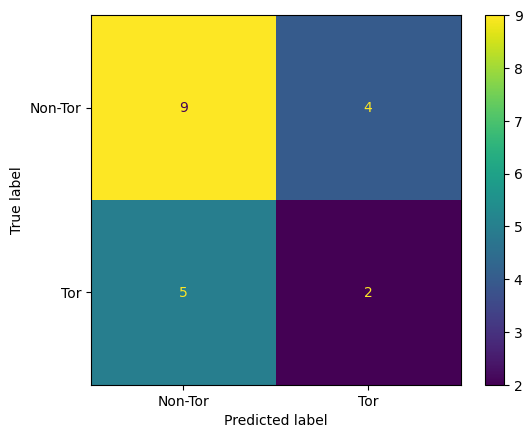

The optimal number of features: 10
Elapsed time to compute :  0.26114535331726074
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




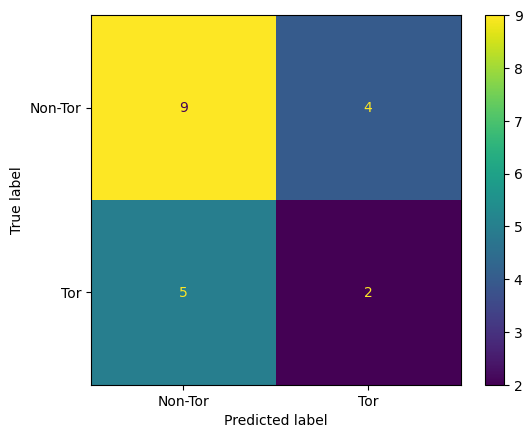

The optimal number of features: 10
Elapsed time to compute :  0.1651153564453125
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




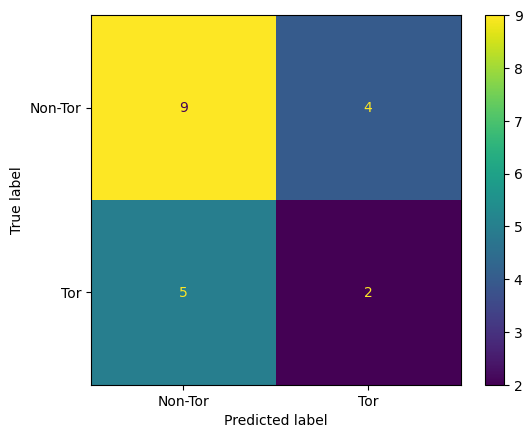

The optimal number of features: 10
Elapsed time to compute :  0.1781327724456787
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




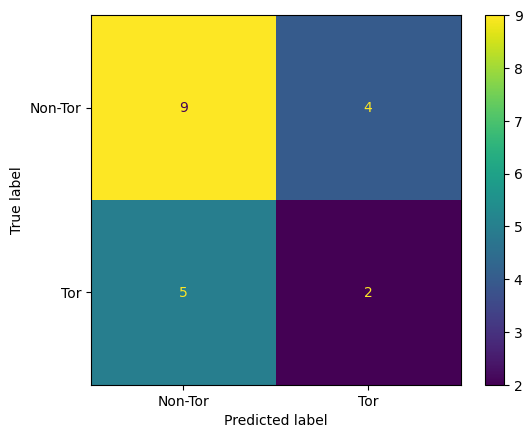

The optimal number of features: 10
Elapsed time to compute :  0.16685700416564941
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




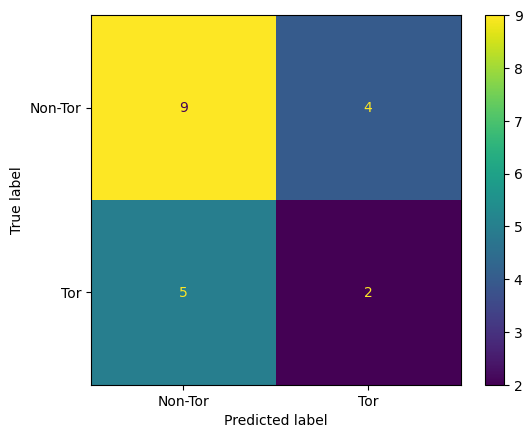

The optimal number of features: 10
Elapsed time to compute :  0.1670844554901123
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




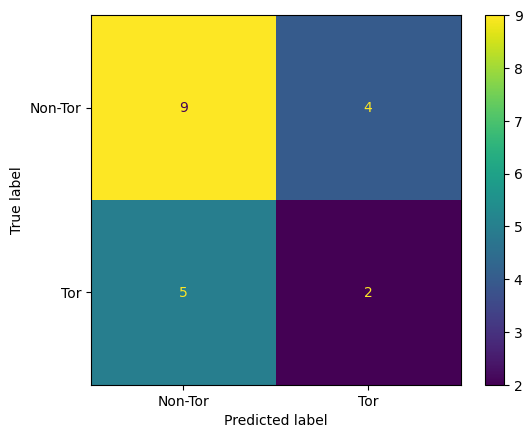

The optimal number of features: 10
Elapsed time to compute :  0.17331671714782715
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




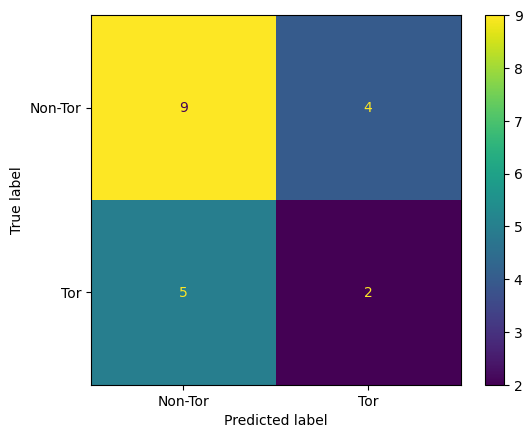

The optimal number of features: 10
Elapsed time to compute :  0.1717381477355957
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




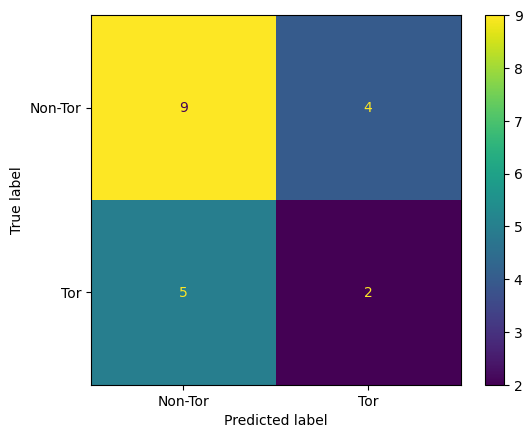

The optimal number of features: 10
Elapsed time to compute :  0.1694788932800293
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




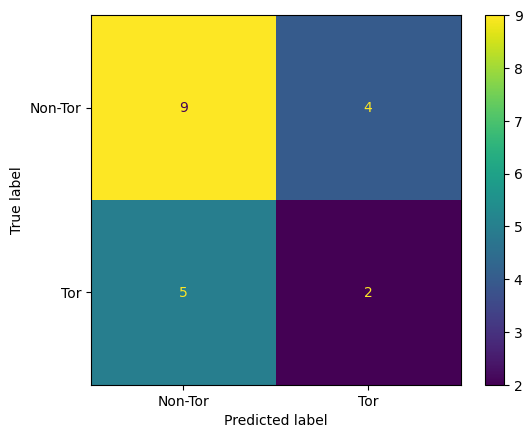

The optimal number of features: 10
Elapsed time to compute :  0.1669149398803711
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




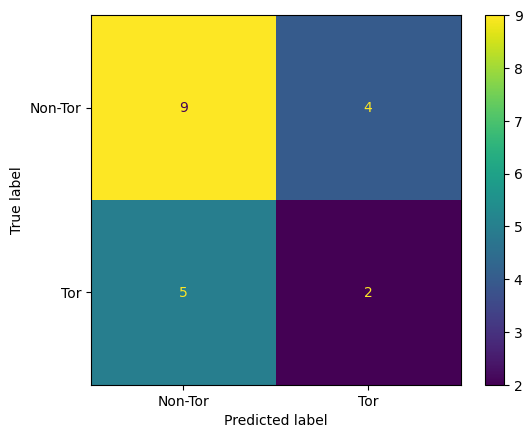

The optimal number of features: 10
Elapsed time to compute :  0.1732630729675293
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




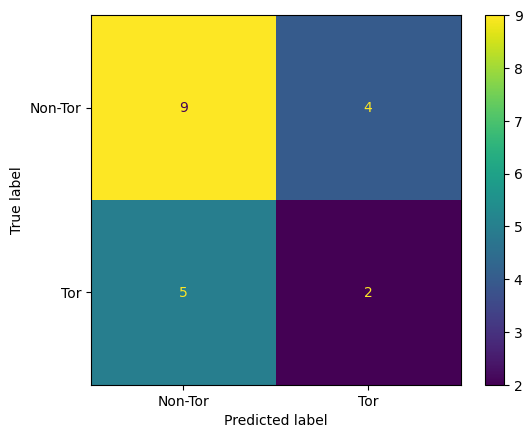

The optimal number of features: 10
Elapsed time to compute :  0.1673908233642578
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




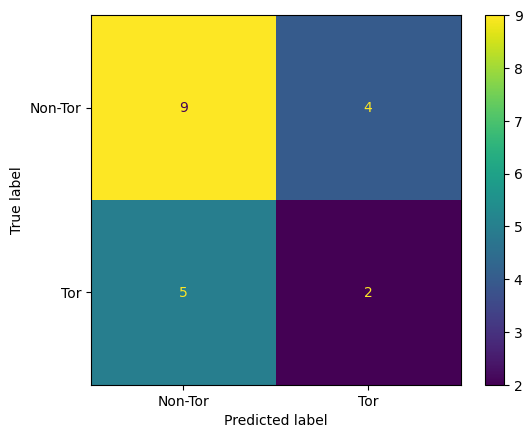

The optimal number of features: 10
Elapsed time to compute :  0.27489399909973145
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




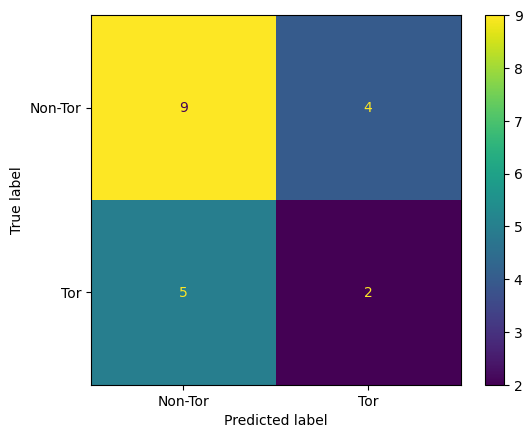

The optimal number of features: 10
Elapsed time to compute :  0.1770784854888916
Accuracy: 55.000000
Precision: 53.452381
Recall: 55.000000
F1_SCORE : 54.102564
Confusion Metrics:
 [[9 4]
 [5 2]]




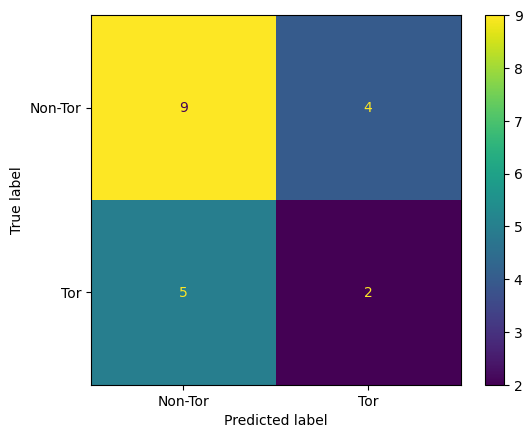

In [196]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

for i in range(5, 79, 5):
    start_time = time.time()
    classifier = RandomForestClassifier(max_depth=19, random_state=50)
    rfe = RFE(estimator=classifier, n_features_to_select=i)
    rfe = rfe.fit(x, arr)  # Fit RFE on the feature matrix 'x'
    x_selected = rfe.transform(x)  # Transform 'x' with the selected features
    print("The optimal number of features:", rfe.n_features_)
    
    X_train, X_test, y_train, y_test = train_test_split(x_selected, arr, test_size=0.2, random_state=1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Rest of your code for evaluation
    # ...

    end_time = time.time()
    time_taken = end_time - start_time
    print("Elapsed time to compute : ", time_taken)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.6f' % (accuracy * 100))
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: %.6f' % (precision * 100))
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: %.6f' % (recall * 100))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('F1_SCORE : %.6f' % (f1 * 100))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Metrics:\n", cm)
    print("\n")
    
    # Specify display labels for the confusion matrix
    display_labels = ['Non-Tor', 'Tor']  # Modify this list based on your classes
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    cm_display.plot()
    plt.show()
